In [535]:
import numpy as np # Algebra Lineal
import pandas as pd # Procesamiendo de los datos  CSV (e.g. pd.read_csv)
import os


In [536]:
import pandas as pd
import numpy as np
import scipy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling as profile   # Para revisar la distribucion y correlacion de los datos
import warnings     # Con esto eliminamos los warnings cuando importamos archivos grandes
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
from pylab import rcParams
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
%matplotlib inline
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42

LABELS = ["Normal", "Fraud"]

# Cargamos los Datasets

In [537]:
# DATASETS DE ENTRENAMIENTO

Train=pd.read_csv('./Data/Train-Target.csv')
Train_Beneficiarydata=pd.read_csv('./Data/Train_Beneficiarydata.csv')
Train_Inpatientdata=pd.read_csv('./Data/Train_Inpatientdata.csv')
Train_Outpatientdata=pd.read_csv('./Data/Train_Outpatientdata.csv')

# DATASESTS DE PRUEBA

Test=pd.read_csv('./Data/Test-Target.csv')
Test_Beneficiarydata=pd.read_csv('./Data/Test_Beneficiarydata.csv')
Test_Inpatientdata=pd.read_csv('./Data/Test_Inpatientdata.csv')
Test_Outpatientdata=pd.read_csv('./Data/Test_Outpatientdata.csv')


## Revisemos el shape de los Datasets

In [538]:
## Shape de los datasets

print('Shape del Train data :',Train.shape)
print('Shape del Train_Beneficiarydata data :',Train_Beneficiarydata.shape)
print('Shape del Train_Inpatientdata data :',Train_Inpatientdata.shape)
print('Shape del Train_Outpatientdata data :',Train_Outpatientdata.shape)

print('Shape del Test data :',Test.shape)
print('Shape del Test_Beneficiarydata data :',Test_Beneficiarydata.shape)
print('Shape del Test_Inpatientdata data :',Test_Inpatientdata.shape)
print('Shape del Test_Outpatientdata data :',Test_Outpatientdata.shape)

Shape del Train data : (5410, 2)
Shape del Train_Beneficiarydata data : (138556, 25)
Shape del Train_Inpatientdata data : (40474, 30)
Shape del Train_Outpatientdata data : (517737, 27)
Shape del Test data : (1353, 1)
Shape del Test_Beneficiarydata data : (63968, 25)
Shape del Test_Inpatientdata data : (9551, 30)
Shape del Test_Outpatientdata data : (125841, 27)


### Entendamos la informacion

In [539]:
## Veamos el shape de nuestra data de entrenamiento y prueba

print('Train Shape:',Train.shape,'\n')
print('Train Sample:\n',Train.head(2),'\n')

print('\n Test Shape:',Test.shape,'\n')
print('Test Sample: \n',Test.head(2))

Train Shape: (5410, 2) 

Train Sample:
    Provider PotentialFraud
0  PRV51001             No
1  PRV51003            Yes 


 Test Shape: (1353, 1) 

Test Sample: 
    Provider
0  PRV51002
1  PRV51006


### Revisamos si los detalles de los proveedores son unicos o no en los datos de entrenamiento

In [540]:
# Numero de proveedores que no se repiten, data.check para los duplicados
print(Train.Provider.value_counts(sort=True,ascending=False).head(2))  

print('\n Total de valores faltantes en el conjunto de entrenamiento:',Train.isna().sum().sum())

print('\n Total de valores faltantes en el conjunto de entrenamiento :',Test.isna().sum().sum())

PRV52208    1
PRV57328    1
Name: Provider, dtype: int64

 Total de valores faltantes en el conjunto de entrenamiento: 0

 Total de valores faltantes en el conjunto de entrenamiento : 0


### Entendamos los datos de Beneficiarios
Revisamos si hay valores faltantes en cada columna del dataset de beneficiarios:


In [541]:
Train_Beneficiarydata.isna().sum()
Test_Beneficiarydata.isna().sum()

BeneID                                 0
DOB                                    0
DOD                                63394
Gender                                 0
Race                                   0
RenalDiseaseIndicator                  0
State                                  0
County                                 0
NoOfMonths_PartACov                    0
NoOfMonths_PartBCov                    0
ChronicCond_Alzheimer                  0
ChronicCond_Heartfailure               0
ChronicCond_KidneyDisease              0
ChronicCond_Cancer                     0
ChronicCond_ObstrPulmonary             0
ChronicCond_Depression                 0
ChronicCond_Diabetes                   0
ChronicCond_IschemicHeart              0
ChronicCond_Osteoporasis               0
ChronicCond_rheumatoidarthritis        0
ChronicCond_stroke                     0
IPAnnualReimbursementAmt               0
IPAnnualDeductibleAmt                  0
OPAnnualReimbursementAmt               0
OPAnnualDeductib

In [542]:
# Veamos que tipos de datos tiene cada columna del conjunto de datos de beneficiarios
Train_Beneficiarydata.dtypes
Test_Beneficiarydata.dtypes

BeneID                             object
DOB                                object
DOD                                object
Gender                              int64
Race                                int64
RenalDiseaseIndicator              object
State                               int64
County                              int64
NoOfMonths_PartACov                 int64
NoOfMonths_PartBCov                 int64
ChronicCond_Alzheimer               int64
ChronicCond_Heartfailure            int64
ChronicCond_KidneyDisease           int64
ChronicCond_Cancer                  int64
ChronicCond_ObstrPulmonary          int64
ChronicCond_Depression              int64
ChronicCond_Diabetes                int64
ChronicCond_IschemicHeart           int64
ChronicCond_Osteoporasis            int64
ChronicCond_rheumatoidarthritis     int64
ChronicCond_stroke                  int64
IPAnnualReimbursementAmt            int64
IPAnnualDeductibleAmt               int64
OPAnnualReimbursementAmt          

Reemplazamos 2 por 0 para las 'chronic conditions', eso significaria que cuando no es una condicion cronica es 0 y 1 cuando lo es.

In [543]:
Train_Beneficiarydata = Train_Beneficiarydata.replace({'ChronicCond_Alzheimer': 2, 'ChronicCond_Heartfailure': 2, 'ChronicCond_KidneyDisease': 2,
                           'ChronicCond_Cancer': 2, 'ChronicCond_ObstrPulmonary': 2, 'ChronicCond_Depression': 2, 
                           'ChronicCond_Diabetes': 2, 'ChronicCond_IschemicHeart': 2, 'ChronicCond_Osteoporasis': 2, 
                           'ChronicCond_rheumatoidarthritis': 2, 'ChronicCond_stroke': 2 }, 0)

Train_Beneficiarydata = Train_Beneficiarydata.replace({'RenalDiseaseIndicator': 'Y'}, 1)

Test_Beneficiarydata = Test_Beneficiarydata.replace({'ChronicCond_Alzheimer': 2, 'ChronicCond_Heartfailure': 2, 'ChronicCond_KidneyDisease': 2,
                           'ChronicCond_Cancer': 2, 'ChronicCond_ObstrPulmonary': 2, 'ChronicCond_Depression': 2, 
                           'ChronicCond_Diabetes': 2, 'ChronicCond_IschemicHeart': 2, 'ChronicCond_Osteoporasis': 2, 
                           'ChronicCond_rheumatoidarthritis': 2, 'ChronicCond_stroke': 2 }, 0)

Test_Beneficiarydata = Test_Beneficiarydata.replace({'RenalDiseaseIndicator': 'Y'}, 1)

In [544]:
Train_Beneficiarydata.head(1)
Test_Beneficiarydata.head(1)

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,0,1,1,36000,3204,60,70


### Agregamos la edad de las personas basandonos en su fecha de muerte y fecha de nacimiento (DOD y DOB).

In [545]:
## Creamos una columna de edad en el dataset 

Train_Beneficiarydata['DOB'] = pd.to_datetime(Train_Beneficiarydata['DOB'] , format = '%Y-%m-%d')
Train_Beneficiarydata['DOD'] = pd.to_datetime(Train_Beneficiarydata['DOD'],format = '%Y-%m-%d',errors='ignore')
Train_Beneficiarydata['Age'] = round(((Train_Beneficiarydata['DOD'] - Train_Beneficiarydata['DOB']).dt.days)/365)


Test_Beneficiarydata['DOB'] = pd.to_datetime(Test_Beneficiarydata['DOB'] , format = '%Y-%m-%d')
Test_Beneficiarydata['DOD'] = pd.to_datetime(Test_Beneficiarydata['DOD'],format = '%Y-%m-%d',errors='ignore')
Test_Beneficiarydata['Age'] = round(((Test_Beneficiarydata['DOD'] - Test_Beneficiarydata['DOB']).dt.days)/365)

Como vemos, en el ultimo valor de DOD es 2009-12-01, eso significa que los datos de los detalles del beneficiario son del año 2009. Entonces vamos a calcular la edad de otros beneficiarios par el año 2009.

In [546]:
Train_Beneficiarydata.Age.fillna(round(((pd.to_datetime('2009-12-01' , format = '%Y-%m-%d') - Train_Beneficiarydata['DOB']).dt.days)/365),
                                 inplace=True)


Test_Beneficiarydata.Age.fillna(round(((pd.to_datetime('2009-12-01' , format = '%Y-%m-%d') - Test_Beneficiarydata['DOB']).dt.days)/365),
                                 inplace=True)

In [547]:
Train_Beneficiarydata.head(2)
Test_Beneficiarydata.head(2)

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age
0,BENE11001,1943-01-01,NaT,1,1,0,39,230,12,12,...,1,1,0,1,1,36000,3204,60,70,67.0
1,BENE11007,1940-09-01,2009-12-01,1,2,0,45,610,12,12,...,1,0,1,1,0,0,0,1490,160,69.0


### Agregamos una columna bandera 'WheterDead' con los valores del DOD para saber si el beneficiario esta muerto o no.

In [548]:
# Creamos una nueva variable con el nombre 'WhetherDead' como bandera. Si el valor es 1 = Esta muerto y 0 = No esta muerto

Train_Beneficiarydata.loc[Train_Beneficiarydata.DOD.isna(),'WhetherDead']=0
Train_Beneficiarydata.loc[Train_Beneficiarydata.DOD.notna(),'WhetherDead']=1
Train_Beneficiarydata.loc[:,'WhetherDead'].head(7)


Test_Beneficiarydata.loc[Test_Beneficiarydata.DOD.isna(),'WhetherDead']=0
Test_Beneficiarydata.loc[Test_Beneficiarydata.DOD.notna(),'WhetherDead']=1
Test_Beneficiarydata.loc[:,'WhetherDead'].head(3)

0    0.0
1    1.0
2    0.0
Name: WhetherDead, dtype: float64

## Revisando la data de los pacientes hospitalizados
Veamos primero hay o no valores faltantes.


In [549]:
Train_Inpatientdata.isna().sum()

Test_Inpatientdata.isna().sum()

BeneID                       0
ClaimID                      0
ClaimStartDt                 0
ClaimEndDt                   0
Provider                     0
InscClaimAmtReimbursed       0
AttendingPhysician          31
OperatingPhysician        3962
OtherPhysician            8538
AdmissionDt                  0
ClmAdmitDiagnosisCode        0
DeductibleAmtPaid          196
DischargeDt                  0
DiagnosisGroupCode           0
ClmDiagnosisCode_1           0
ClmDiagnosisCode_2          54
ClmDiagnosisCode_3         169
ClmDiagnosisCode_4         404
ClmDiagnosisCode_5         719
ClmDiagnosisCode_6        1197
ClmDiagnosisCode_7        1736
ClmDiagnosisCode_8        2360
ClmDiagnosisCode_9        3238
ClmDiagnosisCode_10       8664
ClmProcedureCode_1        4118
ClmProcedureCode_2        8297
ClmProcedureCode_3        9328
ClmProcedureCode_4        9522
ClmProcedureCode_5        9549
ClmProcedureCode_6        9551
dtype: int64

In [550]:
Train_Inpatientdata.dtypes

BeneID                     object
ClaimID                    object
ClaimStartDt               object
ClaimEndDt                 object
Provider                   object
InscClaimAmtReimbursed      int64
AttendingPhysician         object
OperatingPhysician         object
OtherPhysician             object
AdmissionDt                object
ClmAdmitDiagnosisCode      object
DeductibleAmtPaid         float64
DischargeDt                object
DiagnosisGroupCode         object
ClmDiagnosisCode_1         object
ClmDiagnosisCode_2         object
ClmDiagnosisCode_3         object
ClmDiagnosisCode_4         object
ClmDiagnosisCode_5         object
ClmDiagnosisCode_6         object
ClmDiagnosisCode_7         object
ClmDiagnosisCode_8         object
ClmDiagnosisCode_9         object
ClmDiagnosisCode_10        object
ClmProcedureCode_1        float64
ClmProcedureCode_2        float64
ClmProcedureCode_3        float64
ClmProcedureCode_4        float64
ClmProcedureCode_5        float64
ClmProcedureCo

### Creamos una columna para indicar la cantidad de dias que el paciente fue admitido para hospitalizacion. 
El nombre de la nueva columna sera 'AdmitForDays'. Como el paciente puede ser admitido por 1 dia, vamos a agregar 1 a la diferencia entre la fecha de alta y la fecha de admision.

In [551]:
Train_Inpatientdata['AdmissionDt'] = pd.to_datetime(Train_Inpatientdata['AdmissionDt'] , format = '%Y-%m-%d')
Train_Inpatientdata['DischargeDt'] = pd.to_datetime(Train_Inpatientdata['DischargeDt'],format = '%Y-%m-%d')
Train_Inpatientdata['AdmitForDays'] = ((Train_Inpatientdata['DischargeDt'] - Train_Inpatientdata['AdmissionDt']).dt.days)+1


Test_Inpatientdata['AdmissionDt'] = pd.to_datetime(Test_Inpatientdata['AdmissionDt'] , format = '%Y-%m-%d')
Test_Inpatientdata['DischargeDt'] = pd.to_datetime(Test_Inpatientdata['DischargeDt'],format = '%Y-%m-%d')
Test_Inpatientdata['AdmitForDays'] = ((Test_Inpatientdata['DischargeDt'] - Test_Inpatientdata['AdmissionDt']).dt.days)+1

Vamos a revisar los valores minimos y maximos para la columna que creamos en los datos de entrenamiento y los de prueba ("AdmitForDays")

In [552]:
print('Min AdmitForDays Train:- ',Train_Inpatientdata.AdmitForDays.min())
print('Max AdmitForDays Train:- ',Train_Inpatientdata.AdmitForDays.max())
Train_Inpatientdata.AdmitForDays.isnull().sum()   # Revisemos valores nulos.

print('Min AdmitForDays Test:- ',Test_Inpatientdata.AdmitForDays.min())
print('Max AdmitForDays Test:- ',Test_Inpatientdata.AdmitForDays.max())
Test_Inpatientdata.AdmitForDays.isnull().sum()   # Revisemos valores nulos.

Min AdmitForDays Train:-  1
Max AdmitForDays Train:-  36
Min AdmitForDays Test:-  1
Max AdmitForDays Test:-  36


0

## Revisando la data de los pacientes externos o ambulatorios.

In [553]:
Train_Outpatientdata.isna().sum()
Test_Outpatientdata.isna().sum()

BeneID                         0
ClaimID                        0
ClaimStartDt                   0
ClaimEndDt                     0
Provider                       0
InscClaimAmtReimbursed         0
AttendingPhysician           316
OperatingPhysician        104237
OtherPhysician             78222
ClmDiagnosisCode_1          2578
ClmDiagnosisCode_2         47731
ClmDiagnosisCode_3         76575
ClmDiagnosisCode_4         95371
ClmDiagnosisCode_5        107875
ClmDiagnosisCode_6        114035
ClmDiagnosisCode_7        117871
ClmDiagnosisCode_8        120310
ClmDiagnosisCode_9        122278
ClmDiagnosisCode_10       125578
ClmProcedureCode_1        125807
ClmProcedureCode_2        125832
ClmProcedureCode_3        125839
ClmProcedureCode_4        125841
ClmProcedureCode_5        125841
ClmProcedureCode_6        125841
DeductibleAmtPaid              0
ClmAdmitDiagnosisCode     100036
dtype: int64

In [554]:
Train_Outpatientdata.dtypes

BeneID                     object
ClaimID                    object
ClaimStartDt               object
ClaimEndDt                 object
Provider                   object
InscClaimAmtReimbursed      int64
AttendingPhysician         object
OperatingPhysician         object
OtherPhysician             object
ClmDiagnosisCode_1         object
ClmDiagnosisCode_2         object
ClmDiagnosisCode_3         object
ClmDiagnosisCode_4         object
ClmDiagnosisCode_5         object
ClmDiagnosisCode_6         object
ClmDiagnosisCode_7         object
ClmDiagnosisCode_8         object
ClmDiagnosisCode_9         object
ClmDiagnosisCode_10        object
ClmProcedureCode_1        float64
ClmProcedureCode_2        float64
ClmProcedureCode_3        float64
ClmProcedureCode_4        float64
ClmProcedureCode_5        float64
ClmProcedureCode_6        float64
DeductibleAmtPaid           int64
ClmAdmitDiagnosisCode      object
dtype: object

## Shape de los datasets luego de agregar nuevas variables

In [555]:
print('Shape del Train data :',Train.shape)
print('Shape del Train_Beneficiarydata data :',Train_Beneficiarydata.shape)
print('Shape del Train_Inpatientdata data :',Train_Inpatientdata.shape)
print('Shape del Train_Outpatientdata data :',Train_Outpatientdata.shape)

print('Shape del Test data :',Test.shape)
print('Shape del Test_Beneficiarydata data :',Test_Beneficiarydata.shape)
print('Shape del Test_Inpatientdata data :',Test_Inpatientdata.shape)
print('Shape del Test_Outpatientdata data :',Test_Outpatientdata.shape)

Shape del Train data : (5410, 2)
Shape del Train_Beneficiarydata data : (138556, 27)
Shape del Train_Inpatientdata data : (40474, 31)
Shape del Train_Outpatientdata data : (517737, 27)
Shape del Test data : (1353, 1)
Shape del Test_Beneficiarydata data : (63968, 27)
Shape del Test_Inpatientdata data : (9551, 31)
Shape del Test_Outpatientdata data : (125841, 27)


# Union de los datasets
Luego de ver las columnas de los pacientes externos y los pacientes hospitalizados podemos ver que son similares, entonces vamos a unirlos basandonos en su llave similares utilizando un Outer Join 

In [556]:
Key_Column_To_Merge_Outpatient=Train_Outpatientdata.columns
print(Key_Column_To_Merge_Outpatient)

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],
      dtype='object')


### Combinando los datos de los pacientes externos y hospitalizados crearemos un solo conjunto de datos para todos los pacientes.

Utilizaremos todas las llaves de los datos de pacientes externos ya que queremos hacer una union y no duplicar las columnas de ambas tablas.

In [557]:
Train_Allpatientdata=pd.merge(Train_Outpatientdata,Train_Inpatientdata,
                              left_on=['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],
                              right_on=['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode']
                              ,how='outer')


Test_Allpatientdata=pd.merge(Test_Outpatientdata,Test_Inpatientdata,
                              left_on=['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],
                              right_on=['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode']
                              ,how='outer')

In [558]:
print('Train_Allpatientdata',Train_Allpatientdata.shape)
print('Test_Allpatientdata',Test_Allpatientdata.shape)

Train_Allpatientdata (558211, 31)
Test_Allpatientdata (135392, 31)


In [559]:
Train_Allpatientdata.head(4)
Test_Allpatientdata.head(4)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,AdmissionDt,DischargeDt,DiagnosisGroupCode,AdmitForDays
0,BENE11001,CLM392397,2009-06-02,2009-06-02,PRV55962,30,PHY347633,NaN,PHY347633,V5832,...,NaN,NaN,NaN,NaN,0.0,NaN,NaT,NaT,NaN,NaN
1,BENE11001,CLM430760,2009-06-23,2009-06-23,PRV56112,30,PHY381777,NaN,PHY381777,9594,...,NaN,NaN,NaN,NaN,0.0,NaN,NaT,NaT,NaN,NaN
2,BENE11007,CLM233081,2009-03-07,2009-03-07,PRV56979,200,PHY425311,NaN,PHY425311,7248,...,NaN,NaN,NaN,NaN,0.0,NaN,NaT,NaT,NaN,NaN
3,BENE11007,CLM496381,2009-07-29,2009-07-29,PRV56573,10,PHY393253,PHY347995,NaN,58889,...,NaN,NaN,NaN,NaN,0.0,5939,NaT,NaT,NaN,NaN


### Combinando los detalles de los beneficiarios con los datos de todos los pacientes.

Para ello se combinaran todos los datos del paciente con los datos de los detalles del beneficiario basandonos en 'BeneID' como clave de union para hacer un Inner Join.

In [560]:
Train_AllPatientDetailsdata=pd.merge(Train_Allpatientdata,Train_Beneficiarydata,left_on='BeneID',right_on='BeneID',how='inner')

Test_AllPatientDetailsdata=pd.merge(Test_Allpatientdata,Test_Beneficiarydata,left_on='BeneID',right_on='BeneID',how='inner')

In [561]:
## Veamos el shape de los datos
print('Shape de todos los pacientes detallados en el Train : ',Train_AllPatientDetailsdata.shape)
Train_AllPatientDetailsdata.head()

print('Shape de todos los pacientes detallados en el Test : ',Test_AllPatientDetailsdata.shape)
Test_AllPatientDetailsdata.head(2)

Shape de todos los pacientes detallados en el Train :  (558211, 57)
Shape de todos los pacientes detallados en el Test :  (135392, 57)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,WhetherDead
0,BENE11001,CLM392397,2009-06-02,2009-06-02,PRV55962,30,PHY347633,NaN,PHY347633,V5832,...,1,0,1,1,36000,3204,60,70,67.0,0.0
1,BENE11001,CLM430760,2009-06-23,2009-06-23,PRV56112,30,PHY381777,NaN,PHY381777,9594,...,1,0,1,1,36000,3204,60,70,67.0,0.0


# ETIQUETADO DE FRAUDE

### Cobinando los detalles de 'PotentialFraud' para cada proveedor para crear 'ProviderWithPatientDetails'
Para ello vamos a combinar los datos de los pacientes con los detalles de los proveedores fraudulentos con 'Provider' como la llave de union utilizando un Inner Join


In [562]:
Train_ProviderWithPatientDetailsdata=pd.merge(Train,Train_AllPatientDetailsdata,on='Provider')

Test_ProviderWithPatientDetailsdata=pd.merge(Test,Test_AllPatientDetailsdata,on='Provider')

In [563]:
## Veamos el shape del dataset  
print("Shape del proveedor del Train con datos de detalles del paciente :-",Train_ProviderWithPatientDetailsdata.shape)
Train_ProviderWithPatientDetailsdata.head()

print("Shape del proveedor del Test con datos de detalles del paciente :-",Test_ProviderWithPatientDetailsdata.shape)
Test_ProviderWithPatientDetailsdata.head(2)

Shape del proveedor del Train con datos de detalles del paciente :- (558211, 58)
Shape del proveedor del Test con datos de detalles del paciente :- (135392, 57)


,Provider,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,WhetherDead
0,PRV51002,BENE13342,CLM129901,2009-01-10,2009-01-10,100,PHY418314,PHY418314,PHY413853,514,...,0,0,0,0,0,0,1310,590,75.0,0.0
1,PRV51002,BENE13915,CLM163936,2009-01-29,2009-01-29,40,PHY399539,PHY421140,NaN,7840,...,1,0,0,0,22000,3204,1020,910,89.0,0.0


Revisemos el porcentaje de valores faltantes en nuestro dataset completo

In [564]:
#print('Porcentajes de valores faltantes del dataset de entrenamiento con el proveedor y la informacion de pacientes detallada:\n')
Train_ProviderWithPatientDetailsdata.isnull().sum()*100/len(Train_ProviderWithPatientDetailsdata)


print('Porcentajes de valores faltantes del dataset de prueba con el proveedor y la informacion de pacientes detallada :\n')
Test_ProviderWithPatientDetailsdata.isnull().sum()*100/len(Test_ProviderWithPatientDetailsdata)

Porcentajes de valores faltantes del dataset de prueba con el proveedor y la informacion de pacientes detallada :



Provider                             0.000000
BeneID                               0.000000
ClaimID                              0.000000
ClaimStartDt                         0.000000
ClaimEndDt                           0.000000
InscClaimAmtReimbursed               0.000000
AttendingPhysician                   0.256293
OperatingPhysician                  79.915357
OtherPhysician                      64.080596
ClmDiagnosisCode_1                   1.904101
ClmDiagnosisCode_2                  35.293814
ClmDiagnosisCode_3                  56.682817
ClmDiagnosisCode_4                  70.739039
ClmDiagnosisCode_5                  80.207102
ClmDiagnosisCode_6                  85.109903
ClmDiagnosisCode_7                  88.341261
ClmDiagnosisCode_8                  90.603581
ClmDiagnosisCode_9                  92.705625
ClmDiagnosisCode_10                 99.150615
ClmProcedureCode_1                  95.962095
ClmProcedureCode_2                  99.067153
ClmProcedureCode_3                

Revisemos los tipos de datos en ambos datasets (Train y Test)

In [565]:
Train_ProviderWithPatientDetailsdata.dtypes
Test_ProviderWithPatientDetailsdata.dtypes


Provider                                   object
BeneID                                     object
ClaimID                                    object
ClaimStartDt                               object
ClaimEndDt                                 object
InscClaimAmtReimbursed                      int64
AttendingPhysician                         object
OperatingPhysician                         object
OtherPhysician                             object
ClmDiagnosisCode_1                         object
ClmDiagnosisCode_2                         object
ClmDiagnosisCode_3                         object
ClmDiagnosisCode_4                         object
ClmDiagnosisCode_5                         object
ClmDiagnosisCode_6                         object
ClmDiagnosisCode_7                         object
ClmDiagnosisCode_8                         object
ClmDiagnosisCode_9                         object
ClmDiagnosisCode_10                        object
ClmProcedureCode_1                        float64


# Analisis Exploratorio
Veamos la proporcion del fraude potencial  en ambos conjuntos de datos combinados.

### Graficamos la frecuencia de los reclamos fraudulentos y no fraudulentos


Distribucion porcentual de la clase de potencial fraude:- 
 No     61.878931
Yes    38.121069
Name: PotentialFraud, dtype: float64


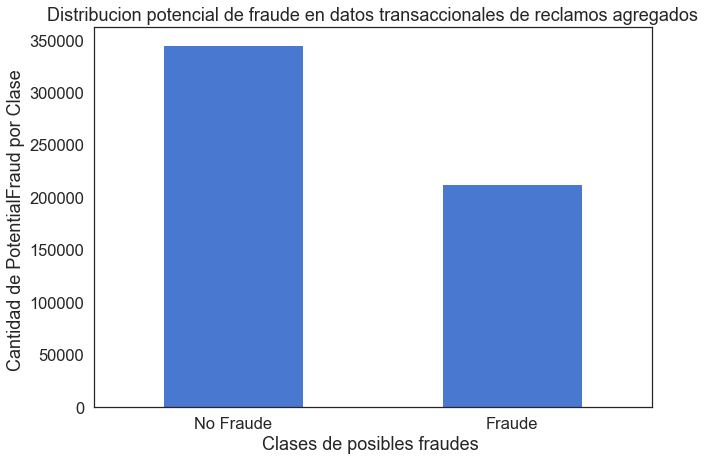

In [566]:
sns.set_style('white',rc={'figure.figsize':(12,8)})
count_classes = pd.value_counts(Train_ProviderWithPatientDetailsdata['PotentialFraud'], sort = True)
print("Distribucion porcentual de la clase de potencial fraude:- \n",count_classes*100/len(Train_ProviderWithPatientDetailsdata))
LABELS = ["No Fraude", "Fraude"]
# Dibujamos un grafico de barras
count_classes.plot(kind = 'bar', rot=0,figsize=(10,7))

# titulos 
plt.title("Distribucion potencial de fraude en datos transaccionales de reclamos agregados")
plt.xticks(range(2), LABELS)
plt.xlabel("Clases de posibles fraudes ")
plt.ylabel("Cantidad de PotentialFraud por Clase ")

plt.savefig('PotentialFraudDistributionInMergedData')

### Graficamos las frecuencias de las transacciones fraudulentas y no fraudulentas en los datos de entrenamiento

Distribucion porcentual de la clase de Fraude Potencial:- 
 No     90.64695
Yes     9.35305
Name: PotentialFraud, dtype: float64


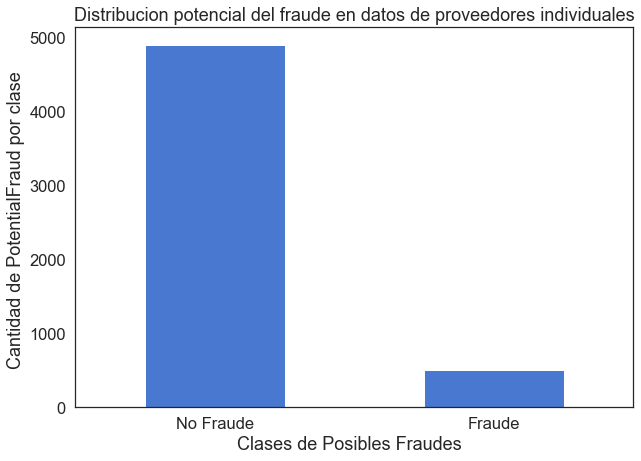

In [567]:

count_classes_provider = pd.value_counts(Train['PotentialFraud'], sort = True)
print("Distribucion porcentual de la clase de Fraude Potencial:- \n",count_classes_provider*100/len(Train))
LABELS = ["No Fraude", "Fraude"]
#Grafico de barras
count_classes_provider.plot(kind = 'bar', rot=0,figsize=(10,7))

# Titulos 
plt.title("Distribucion potencial del fraude en datos de proveedores individuales")
plt.xticks(range(2), LABELS)
plt.xlabel("Clases de Posibles Fraudes  ")
plt.ylabel("Cantidad de PotentialFraud por clase ")


plt.savefig('PotentialFraudDistributionImbalance')

De los dos graficos anteriores podemos decir, que la proporcion de transacciones de reclamos fraudulentos es mayor en comparacion con los proveedores que no fraudulentos. Por lo tanto, debemos obtener informacion sobre la cantidad de transacciones de reclamos y los montos involucrados de los siguientes:



*   Beneficiario
*   Beneficiario + Medico
*   Medico
*   Diagnostico
*   Procedimiento
*   Etc





In [568]:
print('Porcentaje de distribucion de Proveedores Fraudes|NoFraudes  en todo el dataset:\n',count_classes/len(Train_ProviderWithPatientDetailsdata)*100)

Porcentaje de distribucion de Proveedores Fraudes|NoFraudes  en todo el dataset:
 No     61.878931
Yes    38.121069
Name: PotentialFraud, dtype: float64


In [569]:
print('Porcentaje de distribucion de Proveedores Fraudulento y No Fraudulentos:\n',count_classes_provider/len(Train)*100)

Porcentaje de distribucion de Proveedores Fraudulento y No Fraudulentos:
 No     90.64695
Yes     9.35305
Name: PotentialFraud, dtype: float64


### Distribucion porcentual de beneficiarios por estado:

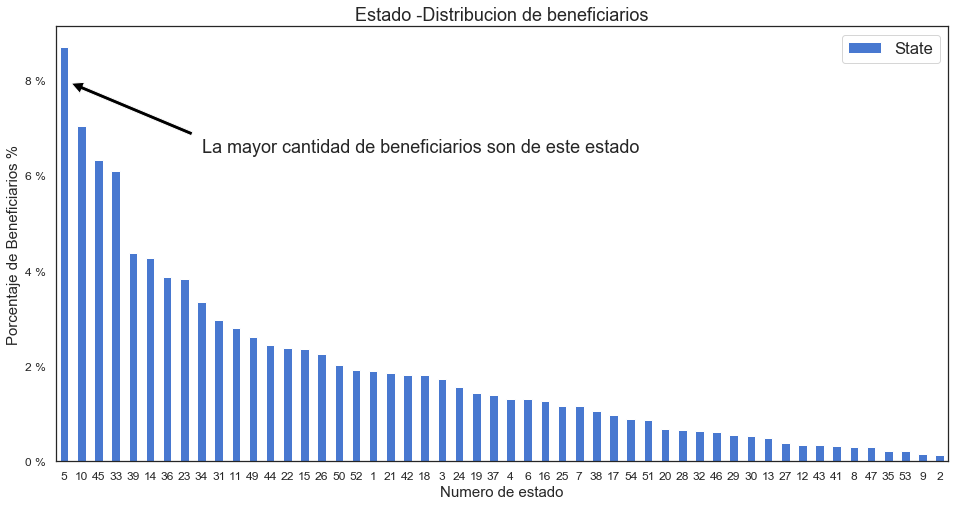

<Figure size 1008x576 with 0 Axes>

In [570]:
# Grafucamos las frecuencias de beneficiarios por estado 
count_States = pd.value_counts(Train_Beneficiarydata['State'], sort = True)
#print("Distribución porcentual de beneficiarios por estado:- \n",count_States*100/len(Train_Beneficiarydata))

# Grafico de barras
(count_States*100/len(Train_Beneficiarydata)).plot(kind = 'bar', rot=0,figsize=(16,8),fontsize=12,legend=True)

# Titulos del grafico

plt.annotate('La mayor cantidad de beneficiarios son de este estado', xy=(0.01,8), xytext=(8, 6.5),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.yticks(np.arange(0,10,2), ('0 %','2 %', '4 %', '6 %', '8 %', '10%'))
plt.title("Estado -Distribucion de beneficiarios",fontsize=18)
plt.xlabel("Numero de estado",fontsize=15)
plt.ylabel("Porcentaje de Beneficiarios "'%',fontsize=15)
plt.show()

plt.savefig('StateWiseBeneficiaryDistribution')

En el grafico anterior muestra los principales estados que tienen un mayor porcentaje de ditribucion porcentual de beneficiarios. Los estados, 5,10 y 45 son los principales estados en terminos de porcentaje de beneficiarios.

### Distribucion porcentual racial de los beneficiarios

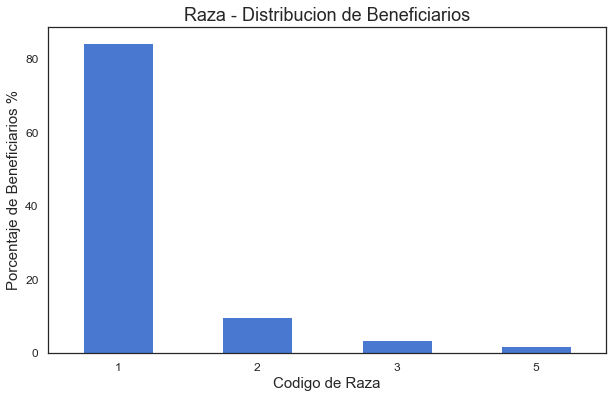

<Figure size 1008x576 with 0 Axes>

In [571]:
# Grafico de frecuencia de las razas por beneficiario
count_Race = pd.value_counts(Train_Beneficiarydata['Race'], sort = True)

# Grafico de barras
(count_Race*100/len(Train_Beneficiarydata)).plot(kind = 'bar', rot=0,figsize=(10,6),fontsize=12)

# Titulos de grafico
plt.yticks(np.arange(0,100,20))#, ('0 %','20 %', '40 %', '60 %', '80 %', '100%'))
plt.title("Raza - Distribucion de Beneficiarios",fontsize=18)
plt.xlabel("Codigo de Raza",fontsize=15)
plt.ylabel("Porcentaje de Beneficiarios "'%',fontsize=15)

plt.show()

plt.savefig('RacewiseBeneficiaryDistribution')

En el grafico anterior podemos ver que mas del 80% de los beneficiarios son de la misma raza siendo la raza 1 y esto nos dice que el maximo de poblacion en el conjunto de datos son pertenecientes a la misma raza. Tambien podemos observar que no hay codigo de raza 4 en el conjunto de datos.

### Los 10 procedimientos principales involucrados en el fraude de atencion medica.

---


Vamos a graficar el recuento por cada categoria identificando si fue o no fraude

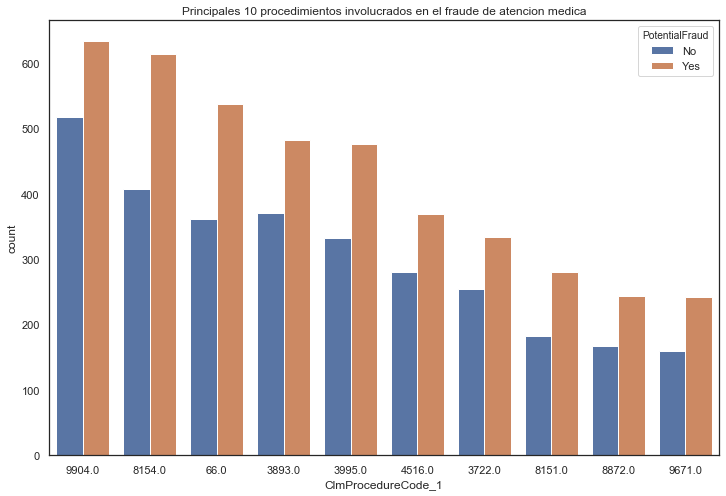

<Figure size 864x576 with 0 Axes>

In [572]:
sns.set(rc={'figure.figsize':(12,8)},style='white')

ax=sns.countplot(x='ClmProcedureCode_1',hue='PotentialFraud',data=Train_ProviderWithPatientDetailsdata
              ,order=Train_ProviderWithPatientDetailsdata.ClmProcedureCode_1.value_counts().iloc[:10].index)

plt.title('Principales 10 procedimientos involucrados en el fraude de atencion medica')
    
plt.show()

plt.savefig('TopProceduresinvlovedinHealthcareFraud')

Segun el grafico anterior, podemos decir que el procedimeinto 9904, 8154 y 66 son los principales 3 involucrados ( en termminos de dinero involucrado). El recuento de la distribucion de reclamos fraudulentos y no fraudulentos muestra transacciones sospechosas involucradas en ellos.

### Principales 10 diagnosticos involucrados en el fraude de atencion medica

---



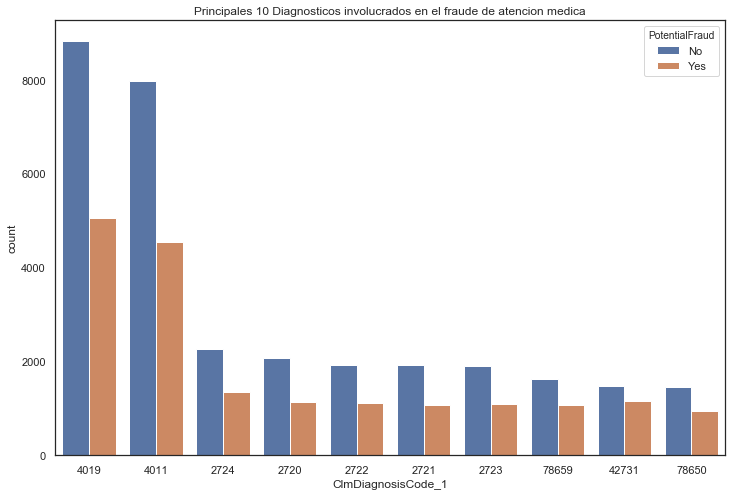

<Figure size 864x576 with 0 Axes>

In [573]:
## Grafiquemos los principales 10 diagnosticos en reclamos involucrados en fraude

sns.set(rc={'figure.figsize':(12,8)},style='white')

sns.countplot(x='ClmDiagnosisCode_1',hue='PotentialFraud',data=Train_ProviderWithPatientDetailsdata
              ,order=Train_ProviderWithPatientDetailsdata.ClmDiagnosisCode_1.value_counts().iloc[:10].index)

plt.title('Principales 10 Diagnosticos involucrados en el fraude de atencion medica')
plt.show()

plt.savefig('TopDiagnosisInnvlovedinHealthcareFraud')

Del grafico anterior podemos identificar que los principales diagnosticos involucrados en fraude son el 4019, 4011 y 2724 (en terminos de dinero involucrado). El recuento de la distribucion de diagnosticos fraudulentos y no fraudulentos muestran transacciones sospechosas involucradas en ellos.

### Los principales 20 medicos involucrados en el fraude en atencion medica

---



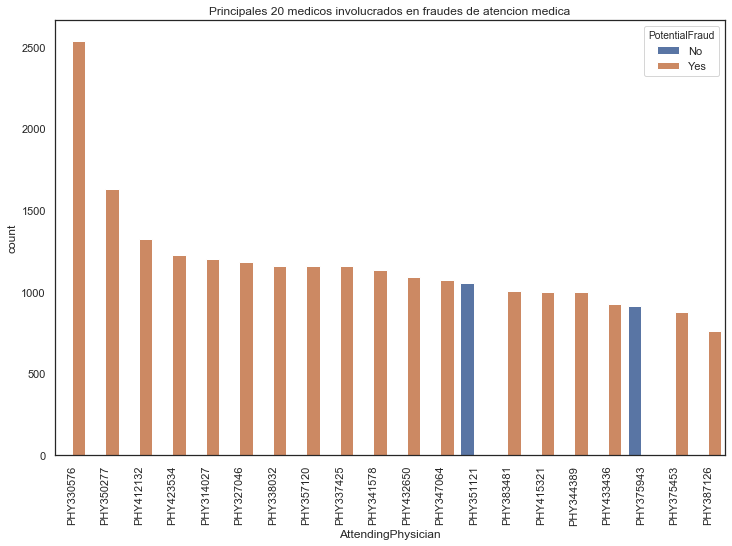

<Figure size 864x576 with 0 Axes>

In [574]:
### Grafiquemos los principales 20 medicos involucrados en fraudes de atencion medica 

sns.set(rc={'figure.figsize':(12,8)},style='white')

ax= sns.countplot(x='AttendingPhysician',hue='PotentialFraud',data=Train_ProviderWithPatientDetailsdata
              ,order=Train_ProviderWithPatientDetailsdata.AttendingPhysician.value_counts().iloc[:20].index)

    
plt.title('Principales 20 medicos involucrados en fraudes de atencion medica')
plt.xticks(rotation=90)
plt.show()

plt.savefig('TopAttendingphysiciansinvlovedinHealthcareFraud')

En el grafico anterior vemos un recuento de participacion de los medicos tratantes y muestra la naturaleza del proveedor con el que estan trabajando, identificando si es fraude o no.





### Comparacion de las categorias involucradas en fraude y las que no.  
IPAnnualDeductibleAmt Vs IPAnnualReimbursementAmt 

---





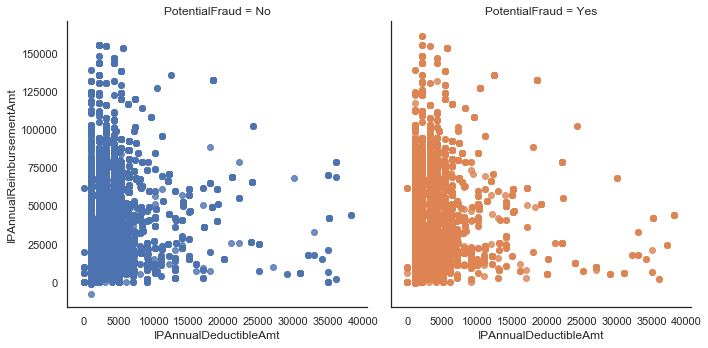

In [575]:
## Grafiquemos IPAnnualDeductibleAmt y IPAnnualReimbursementAmt ambos en sus dos categorias de fraude y no fraude
sns.set(rc={'figure.figsize':(12,8)},style='white')

sns.lmplot(x='IPAnnualDeductibleAmt',y='IPAnnualReimbursementAmt',hue='PotentialFraud',
           col='PotentialFraud',fit_reg=False,data=Train_ProviderWithPatientDetailsdata)

plt.savefig('IPAnnualDeductibleAmtandIPAnnualReimbursementAmtinbothfraudandnonFraud')

Como podemos ver en la anterior grafica, no es visible indentificar la diferencia entre IpAnnualDeductibleAmt y IPAnnualReimbursementAmt.

### Comparacion de DeductibleAmtPaid Vs InsClaimAmtReimbursed dividiendo el fraude potencial 


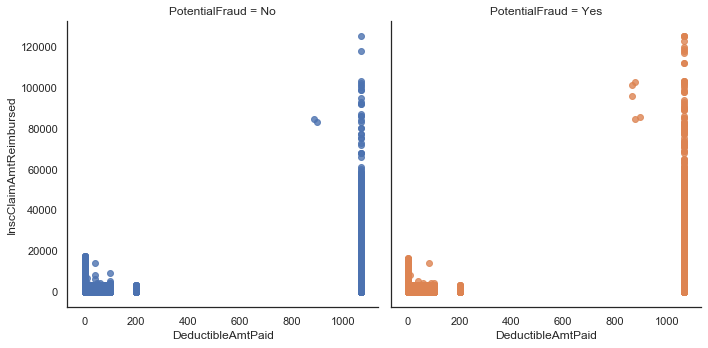

In [576]:
## Grafico que categoriza si es o no fraude utilizando las variables DeductibleAmtPaid y InsClaimAmtReimbursed 
sns.set(rc={'figure.figsize':(12,8)},style='white')

sns.lmplot(x='DeductibleAmtPaid',y='InscClaimAmtReimbursed',hue='PotentialFraud',
           col='PotentialFraud',fit_reg=False,data=Train_ProviderWithPatientDetailsdata)


plt.savefig('DeductibleAmtPaidandInsClaimAmtReimbursed')



Al observar los graficos anteriores, no podemos ver alguna diferencia entre los casos fraudulentos y los que no basandonos unicanemnte en las variables DeductibleAmtPaid y InscClaimAmtReimbursed. Esto nos permite derivar mas caracteristicas del conjunto de datos.

---



### Cantidad de reclamos de serguro en reembolso vs Edad - Categorizado en fraude y no fraude

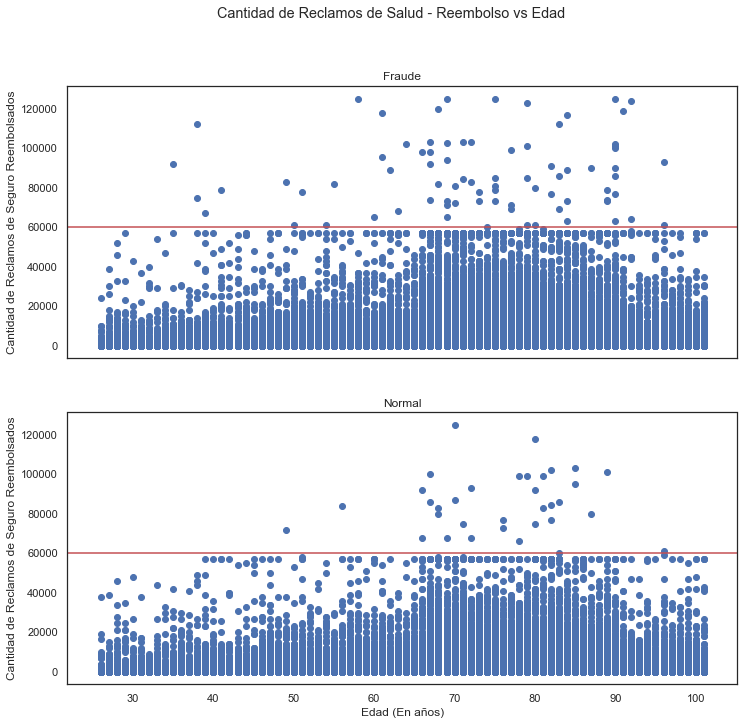

In [577]:
## Veamos la cantidad de reclamos de reembolso vs la edad
sns.set(rc={'figure.figsize':(12,11)},style='white')

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Cantidad de Reclamos de Salud - Reembolso vs Edad')

ax1.scatter(Train_ProviderWithPatientDetailsdata[Train_ProviderWithPatientDetailsdata.PotentialFraud=='Yes'].Age, 
            Train_ProviderWithPatientDetailsdata[Train_ProviderWithPatientDetailsdata.PotentialFraud=='Yes'].InscClaimAmtReimbursed)
ax1.set_title('Fraude')
ax1.axhline(y=60000,c='r')
ax1.set_ylabel('Cantidad de Reclamos de Seguro Reembolsados')

ax2.scatter(Train_ProviderWithPatientDetailsdata[Train_ProviderWithPatientDetailsdata.PotentialFraud=='No'].Age, 
            Train_ProviderWithPatientDetailsdata[Train_ProviderWithPatientDetailsdata.PotentialFraud=='No'].InscClaimAmtReimbursed)
ax2.set_title('Normal')
ax2.axhline(y=60000,c='r')
ax2.set_xlabel('Edad (En años)')
ax2.set_ylabel('Cantidad de Reclamos de Seguro Reembolsados')

plt.show()
f.savefig('AgeVsClaimAmtReimbursed')

Del grafico anterior, vemos que la ocurrencia de casos de potencial fraude es mas frecuente en los grupos de menor edad (30-70 años) en comparacion de los grupos de edad avanzada (70+ años). La edad es una de las caracteristicas importantes para diferenciar el comportamientoi del fraude y no fraude

---



### Agreguemos datos de entrenamiento a los datos de prueba para obtener caracteristicas mas precisas

In [578]:
# Veamos la ultima fila del conjunto de datos Test_ProviderWithPatientDetailsdata

Test_ProviderWithPatientDetailsdata.iloc[[135391]]

,Provider,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,WhetherDead
135391,PRV57750,BENE150236,CLM675578,2009-11-10,2009-11-10,200,PHY323525,PHY323525,PHY323525,4788,...,1,0,0,0,0,0,290,1120,67.0,0.0


In [579]:
# Veamos la ultima fila del conjunto de datos  Train_ProviderWithPatientDetailsdata

Train_ProviderWithPatientDetailsdata.iloc[[558210]]

,Provider,PotentialFraud,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,...,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,WhetherDead
558210,PRV57763,No,BENE158531,CLM701529,2009-11-26,2009-11-26,40,PHY321072,NaN,PHY321072,...,1,0,0,0,0,0,3700,240,58.0,0.0


Al agregar datos del conjunto de entrenamiento al conjunto de prueba nos ayudara a obtener buena puntuacion en las pruebas, ya que podemos observar que no todos los niveles de variables estan presentes en los datos de prueba en comparacion con los de entrenamiento. Entonces, nos vamos a enfocar en agregar datos del conjunto de entrenamiento al de pruebas para sacar nuevas caracteristicas y utilizar unicamente los datos de prueba para evaluar los resultados.

In [580]:
## La seguridad ante todo xD, vamos a hacer una copia de nuestros datos de prueba y la vamos a combinar con los de prueba para tener un conjunto mas robusto
Test_ProviderWithPatientDetailsdata_copy=Test_ProviderWithPatientDetailsdata



In [581]:
# Veamos el shape de nuestra copia
print('Shape  de la copia del conjunto de entrenamiento :-',Test_ProviderWithPatientDetailsdata_copy.shape)

Shape  de la copia del conjunto de entrenamiento :- (135392, 57)


In [582]:
### Vamos a concatenar los dos conjuntos de datos utilizando columnas del conjunto de prueba

col_merge=Test_ProviderWithPatientDetailsdata.columns

In [583]:
## Combinamos  los datasets de entrenamiento y prueba 

Test_ProviderWithPatientDetailsdata=pd.concat([Test_ProviderWithPatientDetailsdata,
                                               Train_ProviderWithPatientDetailsdata[col_merge]])



In [584]:
### Veamos el shape luego de la concatenacion 

print("Shape de la data de entrenamiento despues de concatenar",Test_ProviderWithPatientDetailsdata.shape)

print("Filas espradas despues de la concatenacion",135392+558211)



Shape de la data de entrenamiento despues de concatenar (693603, 57)
Filas espradas despues de la concatenacion 693603


In [585]:
### Veamos el numero de registro 135392 porque es un registro del conjunto de entrenamiento
Test_ProviderWithPatientDetailsdata.iloc[[135392]]



,Provider,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,WhetherDead
0,PRV51001,BENE11727,CLM733300,2009-12-17,2009-12-17,20,PHY383007,NaN,PHY383007,5953,...,1,0,0,0,0,0,300,110,80.0,0.0


Hemos verificado que nuestro primer registro ha sido agregado al conjunto de pruebas correctamente, asi que podemos empezar a encontrar caracteristicas agrupadas segun las columnas del conjunto de datos.

Ademas de las exploraciones y visualizaciones basicas, pueden ser utilizados metodos para identificar pistas de fraude y abuso. Uno de esos metodos sencillos es la **agrupacion basada en similitud**. En este metodo basicamente agrupamos todos los registros por ProcedureCodes, DiagnosisCodes y Provider.

Un ejemplo seria si tenemos un conjunto de datos con codigos de procedimiento solo para el procedimiento X, luego agrupamos y verificamos las cantidades promedio involucradas en cada nivel de procedimiento y analizamos su comportamiento.

---



### Caracteristicas compartidas basadas en variables de agrupacion. Caracteristicas compartidas por proveedor.

In [586]:
Train_ProviderWithPatientDetailsdata["PerProviderAvg_InscClaimAmtReimbursed"]=Train_ProviderWithPatientDetailsdata.groupby('Provider')['InscClaimAmtReimbursed'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerProviderAvg_DeductibleAmtPaid"]=Train_ProviderWithPatientDetailsdata.groupby('Provider')['DeductibleAmtPaid'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerProviderAvg_IPAnnualReimbursementAmt"]=Train_ProviderWithPatientDetailsdata.groupby('Provider')['IPAnnualReimbursementAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerProviderAvg_IPAnnualDeductibleAmt"]=Train_ProviderWithPatientDetailsdata.groupby('Provider')['IPAnnualDeductibleAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerProviderAvg_OPAnnualReimbursementAmt"]=Train_ProviderWithPatientDetailsdata.groupby('Provider')['OPAnnualReimbursementAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerProviderAvg_OPAnnualDeductibleAmt"]=Train_ProviderWithPatientDetailsdata.groupby('Provider')['OPAnnualDeductibleAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerProviderAvg_Age"]=Train_ProviderWithPatientDetailsdata.groupby('Provider')['Age'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerProviderAvg_NoOfMonths_PartACov"]=Train_ProviderWithPatientDetailsdata.groupby('Provider')['NoOfMonths_PartACov'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerProviderAvg_NoOfMonths_PartBCov"]=Train_ProviderWithPatientDetailsdata.groupby('Provider')['NoOfMonths_PartBCov'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerProviderAvg_AdmitForDays"]=Train_ProviderWithPatientDetailsdata.groupby('Provider')['AdmitForDays'].transform('mean')


Test_ProviderWithPatientDetailsdata["PerProviderAvg_InscClaimAmtReimbursed"]=Test_ProviderWithPatientDetailsdata.groupby('Provider')['InscClaimAmtReimbursed'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerProviderAvg_DeductibleAmtPaid"]=Test_ProviderWithPatientDetailsdata.groupby('Provider')['DeductibleAmtPaid'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerProviderAvg_IPAnnualReimbursementAmt"]=Test_ProviderWithPatientDetailsdata.groupby('Provider')['IPAnnualReimbursementAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerProviderAvg_IPAnnualDeductibleAmt"]=Test_ProviderWithPatientDetailsdata.groupby('Provider')['IPAnnualDeductibleAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerProviderAvg_OPAnnualReimbursementAmt"]=Test_ProviderWithPatientDetailsdata.groupby('Provider')['OPAnnualReimbursementAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerProviderAvg_OPAnnualDeductibleAmt"]=Test_ProviderWithPatientDetailsdata.groupby('Provider')['OPAnnualDeductibleAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerProviderAvg_Age"]=Test_ProviderWithPatientDetailsdata.groupby('Provider')['Age'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerProviderAvg_NoOfMonths_PartACov"]=Test_ProviderWithPatientDetailsdata.groupby('Provider')['NoOfMonths_PartACov'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerProviderAvg_NoOfMonths_PartBCov"]=Test_ProviderWithPatientDetailsdata.groupby('Provider')['NoOfMonths_PartBCov'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerProviderAvg_AdmitForDays"]=Test_ProviderWithPatientDetailsdata.groupby('Provider')['AdmitForDays'].transform('mean')

In [587]:
# Shape de los conjuntos de entrenamiento y prueba

print('Train',Train_ProviderWithPatientDetailsdata.shape)
Train_ProviderWithPatientDetailsdata.iloc[:,-10:].head(2)

print("Test ",Test_ProviderWithPatientDetailsdata.shape)
Test_ProviderWithPatientDetailsdata.iloc[:,-10:].head(4)



Train (558211, 68)
Test  (693603, 67)


,PerProviderAvg_InscClaimAmtReimbursed,PerProviderAvg_DeductibleAmtPaid,PerProviderAvg_IPAnnualReimbursementAmt,PerProviderAvg_IPAnnualDeductibleAmt,PerProviderAvg_OPAnnualReimbursementAmt,PerProviderAvg_OPAnnualDeductibleAmt,PerProviderAvg_Age,PerProviderAvg_NoOfMonths_PartACov,PerProviderAvg_NoOfMonths_PartBCov,PerProviderAvg_AdmitForDays
0,262.390244,1.853659,5180.926829,548.253659,2345.073171,677.95122,72.365854,11.82439,12.0,NaN
1,262.390244,1.853659,5180.926829,548.253659,2345.073171,677.95122,72.365854,11.82439,12.0,NaN
2,262.390244,1.853659,5180.926829,548.253659,2345.073171,677.95122,72.365854,11.82439,12.0,NaN
3,262.390244,1.853659,5180.926829,548.253659,2345.073171,677.95122,72.365854,11.82439,12.0,NaN


### Caracteristicas similares agrupadas por **BeneID**

In [588]:
# Al usar la variable BeneID para agrupar podemos explicar los montos involucrados por beneficiario.
# La razon para derivar esta caracteristica es que un beneficiario puede ir con multiples proveedores y puede estar involucrado en casos de fraude
Train_ProviderWithPatientDetailsdata["PerBeneIDAvg_InscClaimAmtReimbursed"]=Train_ProviderWithPatientDetailsdata.groupby('BeneID')['InscClaimAmtReimbursed'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerBeneIDAvg_DeductibleAmtPaid"]=Train_ProviderWithPatientDetailsdata.groupby('BeneID')['DeductibleAmtPaid'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerBeneIDAvg_IPAnnualReimbursementAmt"]=Train_ProviderWithPatientDetailsdata.groupby('BeneID')['IPAnnualReimbursementAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerBeneIDAvg_IPAnnualDeductibleAmt"]=Train_ProviderWithPatientDetailsdata.groupby('BeneID')['IPAnnualDeductibleAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerBeneIDAvg_OPAnnualReimbursementAmt"]=Train_ProviderWithPatientDetailsdata.groupby('BeneID')['OPAnnualReimbursementAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerBeneIDAvg_OPAnnualDeductibleAmt"]=Train_ProviderWithPatientDetailsdata.groupby('BeneID')['OPAnnualDeductibleAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerBeneIDAvg_AdmitForDays"]=Train_ProviderWithPatientDetailsdata.groupby('BeneID')['AdmitForDays'].transform('mean')


Test_ProviderWithPatientDetailsdata["PerBeneIDAvg_InscClaimAmtReimbursed"]=Test_ProviderWithPatientDetailsdata.groupby('BeneID')['InscClaimAmtReimbursed'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerBeneIDAvg_DeductibleAmtPaid"]=Test_ProviderWithPatientDetailsdata.groupby('BeneID')['DeductibleAmtPaid'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerBeneIDAvg_IPAnnualReimbursementAmt"]=Test_ProviderWithPatientDetailsdata.groupby('BeneID')['IPAnnualReimbursementAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerBeneIDAvg_IPAnnualDeductibleAmt"]=Test_ProviderWithPatientDetailsdata.groupby('BeneID')['IPAnnualDeductibleAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerBeneIDAvg_OPAnnualReimbursementAmt"]=Test_ProviderWithPatientDetailsdata.groupby('BeneID')['OPAnnualReimbursementAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerBeneIDAvg_OPAnnualDeductibleAmt"]=Test_ProviderWithPatientDetailsdata.groupby('BeneID')['OPAnnualDeductibleAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerBeneIDAvg_AdmitForDays"]=Test_ProviderWithPatientDetailsdata.groupby('BeneID')['AdmitForDays'].transform('mean')

### Caracteristicas similares agrupadas por **OtherPhysician**

In [589]:
### Caracteristicas similares agrupadas por OtherPhysician.

Train_ProviderWithPatientDetailsdata["PerOtherPhysicianAvg_InscClaimAmtReimbursed"]=Train_ProviderWithPatientDetailsdata.groupby('OtherPhysician')['InscClaimAmtReimbursed'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerOtherPhysicianAvg_DeductibleAmtPaid"]=Train_ProviderWithPatientDetailsdata.groupby('OtherPhysician')['DeductibleAmtPaid'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerOtherPhysicianAvg_IPAnnualReimbursementAmt"]=Train_ProviderWithPatientDetailsdata.groupby('OtherPhysician')['IPAnnualReimbursementAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerOtherPhysicianAvg_IPAnnualDeductibleAmt"]=Train_ProviderWithPatientDetailsdata.groupby('OtherPhysician')['IPAnnualDeductibleAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerOtherPhysicianAvg_OPAnnualReimbursementAmt"]=Train_ProviderWithPatientDetailsdata.groupby('OtherPhysician')['OPAnnualReimbursementAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerOtherPhysicianAvg_OPAnnualDeductibleAmt"]=Train_ProviderWithPatientDetailsdata.groupby('OtherPhysician')['OPAnnualDeductibleAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerOtherPhysicianAvg_AdmitForDays"]=Train_ProviderWithPatientDetailsdata.groupby('OtherPhysician')['AdmitForDays'].transform('mean')

Test_ProviderWithPatientDetailsdata["PerOtherPhysicianAvg_InscClaimAmtReimbursed"]=Test_ProviderWithPatientDetailsdata.groupby('OtherPhysician')['InscClaimAmtReimbursed'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerOtherPhysicianAvg_DeductibleAmtPaid"]=Test_ProviderWithPatientDetailsdata.groupby('OtherPhysician')['DeductibleAmtPaid'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerOtherPhysicianAvg_IPAnnualReimbursementAmt"]=Test_ProviderWithPatientDetailsdata.groupby('OtherPhysician')['IPAnnualReimbursementAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerOtherPhysicianAvg_IPAnnualDeductibleAmt"]=Test_ProviderWithPatientDetailsdata.groupby('OtherPhysician')['IPAnnualDeductibleAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerOtherPhysicianAvg_OPAnnualReimbursementAmt"]=Test_ProviderWithPatientDetailsdata.groupby('OtherPhysician')['OPAnnualReimbursementAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerOtherPhysicianAvg_OPAnnualDeductibleAmt"]=Test_ProviderWithPatientDetailsdata.groupby('OtherPhysician')['OPAnnualDeductibleAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerOtherPhysicianAvg_AdmitForDays"]=Test_ProviderWithPatientDetailsdata.groupby('OtherPhysician')['AdmitForDays'].transform('mean')

### Caracteristicas similares agrupadas por **OperatingPhysician**

In [590]:
## Caracteristicas similares agrupadas por  OperatingPhysician

Train_ProviderWithPatientDetailsdata["PerOperatingPhysicianAvg_InscClaimAmtReimbursed"]=Train_ProviderWithPatientDetailsdata.groupby('OperatingPhysician')['InscClaimAmtReimbursed'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerOperatingPhysicianAvg_DeductibleAmtPaid"]=Train_ProviderWithPatientDetailsdata.groupby('OperatingPhysician')['DeductibleAmtPaid'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerOperatingPhysicianAvg_IPAnnualReimbursementAmt"]=Train_ProviderWithPatientDetailsdata.groupby('OperatingPhysician')['IPAnnualReimbursementAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerOperatingPhysicianAvg_IPAnnualDeductibleAmt"]=Train_ProviderWithPatientDetailsdata.groupby('OperatingPhysician')['IPAnnualDeductibleAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerOperatingPhysicianAvg_OPAnnualReimbursementAmt"]=Train_ProviderWithPatientDetailsdata.groupby('OperatingPhysician')['OPAnnualReimbursementAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerOperatingPhysicianAvg_OPAnnualDeductibleAmt"]=Train_ProviderWithPatientDetailsdata.groupby('OperatingPhysician')['OPAnnualDeductibleAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerOperatingPhysicianAvg_AdmitForDays"]=Train_ProviderWithPatientDetailsdata.groupby('OperatingPhysician')['AdmitForDays'].transform('mean')

Test_ProviderWithPatientDetailsdata["PerOperatingPhysicianAvg_InscClaimAmtReimbursed"]=Test_ProviderWithPatientDetailsdata.groupby('OperatingPhysician')['InscClaimAmtReimbursed'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerOperatingPhysicianAvg_DeductibleAmtPaid"]=Test_ProviderWithPatientDetailsdata.groupby('OperatingPhysician')['DeductibleAmtPaid'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerOperatingPhysicianAvg_IPAnnualReimbursementAmt"]=Test_ProviderWithPatientDetailsdata.groupby('OperatingPhysician')['IPAnnualReimbursementAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerOperatingPhysicianAvg_IPAnnualDeductibleAmt"]=Test_ProviderWithPatientDetailsdata.groupby('OperatingPhysician')['IPAnnualDeductibleAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerOperatingPhysicianAvg_OPAnnualReimbursementAmt"]=Test_ProviderWithPatientDetailsdata.groupby('OperatingPhysician')['OPAnnualReimbursementAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerOperatingPhysicianAvg_OPAnnualDeductibleAmt"]=Test_ProviderWithPatientDetailsdata.groupby('OperatingPhysician')['OPAnnualDeductibleAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerOperatingPhysicianAvg_AdmitForDays"]=Test_ProviderWithPatientDetailsdata.groupby('OperatingPhysician')['AdmitForDays'].transform('mean')

### Caracteristicas similares agrupadas por **AttendingPhysician**

In [591]:
### Caracteristicas similares agrupadas por AttendingPhysician   

Train_ProviderWithPatientDetailsdata["PerAttendingPhysicianAvg_InscClaimAmtReimbursed"]=Train_ProviderWithPatientDetailsdata.groupby('AttendingPhysician')['InscClaimAmtReimbursed'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerAttendingPhysicianAvg_DeductibleAmtPaid"]=Train_ProviderWithPatientDetailsdata.groupby('AttendingPhysician')['DeductibleAmtPaid'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerAttendingPhysicianAvg_IPAnnualReimbursementAmt"]=Train_ProviderWithPatientDetailsdata.groupby('AttendingPhysician')['IPAnnualReimbursementAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerAttendingPhysicianAvg_IPAnnualDeductibleAmt"]=Train_ProviderWithPatientDetailsdata.groupby('AttendingPhysician')['IPAnnualDeductibleAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerAttendingPhysicianAvg_OPAnnualReimbursementAmt"]=Train_ProviderWithPatientDetailsdata.groupby('AttendingPhysician')['OPAnnualReimbursementAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerAttendingPhysicianAvg_OPAnnualDeductibleAmt"]=Train_ProviderWithPatientDetailsdata.groupby('AttendingPhysician')['OPAnnualDeductibleAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerAttendingPhysicianAvg_AdmitForDays"]=Train_ProviderWithPatientDetailsdata.groupby('AttendingPhysician')['AdmitForDays'].transform('mean')


Test_ProviderWithPatientDetailsdata["PerAttendingPhysicianAvg_InscClaimAmtReimbursed"]=Test_ProviderWithPatientDetailsdata.groupby('AttendingPhysician')['InscClaimAmtReimbursed'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerAttendingPhysicianAvg_DeductibleAmtPaid"]=Test_ProviderWithPatientDetailsdata.groupby('AttendingPhysician')['DeductibleAmtPaid'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerAttendingPhysicianAvg_IPAnnualReimbursementAmt"]=Test_ProviderWithPatientDetailsdata.groupby('AttendingPhysician')['IPAnnualReimbursementAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerAttendingPhysicianAvg_IPAnnualDeductibleAmt"]=Test_ProviderWithPatientDetailsdata.groupby('AttendingPhysician')['IPAnnualDeductibleAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerAttendingPhysicianAvg_OPAnnualReimbursementAmt"]=Test_ProviderWithPatientDetailsdata.groupby('AttendingPhysician')['OPAnnualReimbursementAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerAttendingPhysicianAvg_OPAnnualDeductibleAmt"]=Test_ProviderWithPatientDetailsdata.groupby('AttendingPhysician')['OPAnnualDeductibleAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerAttendingPhysicianAvg_AdmitForDays"]=Test_ProviderWithPatientDetailsdata.groupby('AttendingPhysician')['AdmitForDays'].transform('mean')

### Caracteristicas similares agrupadas por **DiagnosisGroupCode**

In [592]:
###  Caracteristicas similares agrupadas por DiagnosisGroupCode  

Train_ProviderWithPatientDetailsdata["PerDiagnosisGroupCodeAvg_InscClaimAmtReimbursed"]=Train_ProviderWithPatientDetailsdata.groupby('DiagnosisGroupCode')['InscClaimAmtReimbursed'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerDiagnosisGroupCodeAvg_DeductibleAmtPaid"]=Train_ProviderWithPatientDetailsdata.groupby('DiagnosisGroupCode')['DeductibleAmtPaid'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerDiagnosisGroupCodeAvg_IPAnnualReimbursementAmt"]=Train_ProviderWithPatientDetailsdata.groupby('DiagnosisGroupCode')['IPAnnualReimbursementAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerDiagnosisGroupCodeAvg_IPAnnualDeductibleAmt"]=Train_ProviderWithPatientDetailsdata.groupby('DiagnosisGroupCode')['IPAnnualDeductibleAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerDiagnosisGroupCodeAvg_OPAnnualReimbursementAmt"]=Train_ProviderWithPatientDetailsdata.groupby('DiagnosisGroupCode')['OPAnnualReimbursementAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerDiagnosisGroupCodeAvg_OPAnnualDeductibleAmt"]=Train_ProviderWithPatientDetailsdata.groupby('DiagnosisGroupCode')['OPAnnualDeductibleAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerDiagnosisGroupCodeAvg_AdmitForDays"]=Train_ProviderWithPatientDetailsdata.groupby('DiagnosisGroupCode')['AdmitForDays'].transform('mean')

Test_ProviderWithPatientDetailsdata["PerDiagnosisGroupCodeAvg_InscClaimAmtReimbursed"]=Test_ProviderWithPatientDetailsdata.groupby('DiagnosisGroupCode')['InscClaimAmtReimbursed'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerDiagnosisGroupCodeAvg_DeductibleAmtPaid"]=Test_ProviderWithPatientDetailsdata.groupby('DiagnosisGroupCode')['DeductibleAmtPaid'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerDiagnosisGroupCodeAvg_IPAnnualReimbursementAmt"]=Test_ProviderWithPatientDetailsdata.groupby('DiagnosisGroupCode')['IPAnnualReimbursementAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerDiagnosisGroupCodeAvg_IPAnnualDeductibleAmt"]=Test_ProviderWithPatientDetailsdata.groupby('DiagnosisGroupCode')['IPAnnualDeductibleAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerDiagnosisGroupCodeAvg_OPAnnualReimbursementAmt"]=Test_ProviderWithPatientDetailsdata.groupby('DiagnosisGroupCode')['OPAnnualReimbursementAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerDiagnosisGroupCodeAvg_OPAnnualDeductibleAmt"]=Test_ProviderWithPatientDetailsdata.groupby('DiagnosisGroupCode')['OPAnnualDeductibleAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerDiagnosisGroupCodeAvg_AdmitForDays"]=Test_ProviderWithPatientDetailsdata.groupby('DiagnosisGroupCode')['AdmitForDays'].transform('mean')

### Caracteristicas similares agrupadas por  **ClmAdmitDiagnosisCode**

In [593]:
### Caracteristicas similares agrupadas por ClmAdmitDiagnosisCode 

Train_ProviderWithPatientDetailsdata["PerClmAdmitDiagnosisCodeAvg_InscClaimAmtReimbursed"]=Train_ProviderWithPatientDetailsdata.groupby('ClmAdmitDiagnosisCode')['InscClaimAmtReimbursed'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmAdmitDiagnosisCodeAvg_DeductibleAmtPaid"]=Train_ProviderWithPatientDetailsdata.groupby('ClmAdmitDiagnosisCode')['DeductibleAmtPaid'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmAdmitDiagnosisCodeAvg_IPAnnualReimbursementAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmAdmitDiagnosisCode')['IPAnnualReimbursementAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmAdmitDiagnosisCodeAvg_IPAnnualDeductibleAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmAdmitDiagnosisCode')['IPAnnualDeductibleAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmAdmitDiagnosisCodeAvg_OPAnnualReimbursementAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmAdmitDiagnosisCode')['OPAnnualReimbursementAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmAdmitDiagnosisCodeAvg_OPAnnualDeductibleAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmAdmitDiagnosisCode')['OPAnnualDeductibleAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmAdmitDiagnosisCodeAvg_AdmitForDays"]=Train_ProviderWithPatientDetailsdata.groupby('ClmAdmitDiagnosisCode')['AdmitForDays'].transform('mean')

Test_ProviderWithPatientDetailsdata["PerClmAdmitDiagnosisCodeAvg_InscClaimAmtReimbursed"]=Test_ProviderWithPatientDetailsdata.groupby('ClmAdmitDiagnosisCode')['InscClaimAmtReimbursed'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmAdmitDiagnosisCodeAvg_DeductibleAmtPaid"]=Test_ProviderWithPatientDetailsdata.groupby('ClmAdmitDiagnosisCode')['DeductibleAmtPaid'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmAdmitDiagnosisCodeAvg_IPAnnualReimbursementAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmAdmitDiagnosisCode')['IPAnnualReimbursementAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmAdmitDiagnosisCodeAvg_IPAnnualDeductibleAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmAdmitDiagnosisCode')['IPAnnualDeductibleAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmAdmitDiagnosisCodeAvg_OPAnnualReimbursementAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmAdmitDiagnosisCode')['OPAnnualReimbursementAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmAdmitDiagnosisCodeAvg_OPAnnualDeductibleAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmAdmitDiagnosisCode')['OPAnnualDeductibleAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmAdmitDiagnosisCodeAvg_AdmitForDays"]=Test_ProviderWithPatientDetailsdata.groupby('ClmAdmitDiagnosisCode')['AdmitForDays'].transform('mean')

### Caracteristicas similares agrupadas por **ClmProcedureCode_1**

In [594]:
### Caracteristicas similares agrupadas por ClmProcedureCode_1 

Train_ProviderWithPatientDetailsdata["PerClmProcedureCode_1Avg_InscClaimAmtReimbursed"]=Train_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_1')['InscClaimAmtReimbursed'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmProcedureCode_1Avg_DeductibleAmtPaid"]=Train_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_1')['DeductibleAmtPaid'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmProcedureCode_1Avg_IPAnnualReimbursementAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_1')['IPAnnualReimbursementAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmProcedureCode_1Avg_IPAnnualDeductibleAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_1')['IPAnnualDeductibleAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmProcedureCode_1Avg_OPAnnualReimbursementAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_1')['OPAnnualReimbursementAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmProcedureCode_1Avg_OPAnnualDeductibleAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_1')['OPAnnualDeductibleAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmProcedureCode_1Avg_AdmitForDays"]=Train_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_1')['AdmitForDays'].transform('mean')


Test_ProviderWithPatientDetailsdata["PerClmProcedureCode_1Avg_InscClaimAmtReimbursed"]=Test_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_1')['InscClaimAmtReimbursed'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmProcedureCode_1Avg_DeductibleAmtPaid"]=Test_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_1')['DeductibleAmtPaid'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmProcedureCode_1Avg_IPAnnualReimbursementAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_1')['IPAnnualReimbursementAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmProcedureCode_1Avg_IPAnnualDeductibleAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_1')['IPAnnualDeductibleAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmProcedureCode_1Avg_OPAnnualReimbursementAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_1')['OPAnnualReimbursementAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmProcedureCode_1Avg_OPAnnualDeductibleAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_1')['OPAnnualDeductibleAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmProcedureCode_1Avg_AdmitForDays"]=Test_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_1')['AdmitForDays'].transform('mean')

Caracteristicas similares agrupadas por **ClmProcedureCode_2**

In [595]:
### Caracteristicas similares agrupadas por ClmProcedureCode_2

Train_ProviderWithPatientDetailsdata["PerClmProcedureCode_2Avg_InscClaimAmtReimbursed"]=Train_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_2')['InscClaimAmtReimbursed'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmProcedureCode_2Avg_DeductibleAmtPaid"]=Train_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_2')['DeductibleAmtPaid'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmProcedureCode_2Avg_IPAnnualReimbursementAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_2')['IPAnnualReimbursementAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmProcedureCode_2Avg_IPAnnualDeductibleAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_2')['IPAnnualDeductibleAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmProcedureCode_2Avg_OPAnnualReimbursementAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_2')['OPAnnualReimbursementAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmProcedureCode_2Avg_OPAnnualDeductibleAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_2')['OPAnnualDeductibleAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmProcedureCode_2Avg_AdmitForDays"]=Train_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_2')['AdmitForDays'].transform('mean')


Test_ProviderWithPatientDetailsdata["PerClmProcedureCode_2Avg_InscClaimAmtReimbursed"]=Test_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_2')['InscClaimAmtReimbursed'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmProcedureCode_2Avg_DeductibleAmtPaid"]=Test_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_2')['DeductibleAmtPaid'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmProcedureCode_2Avg_IPAnnualReimbursementAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_2')['IPAnnualReimbursementAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmProcedureCode_2Avg_IPAnnualDeductibleAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_2')['IPAnnualDeductibleAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmProcedureCode_2Avg_OPAnnualReimbursementAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_2')['OPAnnualReimbursementAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmProcedureCode_2Avg_OPAnnualDeductibleAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_2')['OPAnnualDeductibleAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmProcedureCode_2Avg_AdmitForDays"]=Test_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_2')['AdmitForDays'].transform('mean')

### Caracteristicas similares agrupadas por **ClmProcedureCode_3**

In [596]:
### Caracteristicas similares agrupadas por ClmProcedureCode_3

Train_ProviderWithPatientDetailsdata["PerClmProcedureCode_3Avg_InscClaimAmtReimbursed"]=Train_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_3')['InscClaimAmtReimbursed'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmProcedureCode_3Avg_DeductibleAmtPaid"]=Train_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_3')['DeductibleAmtPaid'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmProcedureCode_3Avg_IPAnnualReimbursementAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_3')['IPAnnualReimbursementAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmProcedureCode_3Avg_IPAnnualDeductibleAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_3')['IPAnnualDeductibleAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmProcedureCode_3Avg_OPAnnualReimbursementAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_3')['OPAnnualReimbursementAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmProcedureCode_3Avg_OPAnnualDeductibleAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_3')['OPAnnualDeductibleAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmProcedureCode_3Avg_AdmitForDays"]=Train_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_3')['AdmitForDays'].transform('mean')


Test_ProviderWithPatientDetailsdata["PerClmProcedureCode_3Avg_InscClaimAmtReimbursed"]=Test_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_3')['InscClaimAmtReimbursed'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmProcedureCode_3Avg_DeductibleAmtPaid"]=Test_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_3')['DeductibleAmtPaid'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmProcedureCode_3Avg_IPAnnualReimbursementAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_3')['IPAnnualReimbursementAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmProcedureCode_3Avg_IPAnnualDeductibleAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_3')['IPAnnualDeductibleAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmProcedureCode_3Avg_OPAnnualReimbursementAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_3')['OPAnnualReimbursementAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmProcedureCode_3Avg_OPAnnualDeductibleAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_3')['OPAnnualDeductibleAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmProcedureCode_3Avg_AdmitForDays"]=Test_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_3')['AdmitForDays'].transform('mean')

### Caracteristicas similares agrupadas por **ClmDiagnosisCode_1**

In [597]:
### Caracteristicas similares agrupadas por ClmDiagnosisCode_1 

Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_1Avg_InscClaimAmtReimbursed"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_1')['InscClaimAmtReimbursed'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_1Avg_DeductibleAmtPaid"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_1')['DeductibleAmtPaid'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_1Avg_IPAnnualReimbursementAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_1')['IPAnnualReimbursementAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_1Avg_IPAnnualDeductibleAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_1')['IPAnnualDeductibleAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_1Avg_OPAnnualReimbursementAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_1')['OPAnnualReimbursementAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_1Avg_OPAnnualDeductibleAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_1')['OPAnnualDeductibleAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_1Avg_AdmitForDays"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_1')['AdmitForDays'].transform('mean')


Test_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_1Avg_InscClaimAmtReimbursed"]=Test_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_1')['InscClaimAmtReimbursed'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_1Avg_DeductibleAmtPaid"]=Test_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_1')['DeductibleAmtPaid'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_1Avg_IPAnnualReimbursementAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_1')['IPAnnualReimbursementAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_1Avg_IPAnnualDeductibleAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_1')['IPAnnualDeductibleAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_1Avg_OPAnnualReimbursementAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_1')['OPAnnualReimbursementAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_1Avg_OPAnnualDeductibleAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_1')['OPAnnualDeductibleAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_1Avg_AdmitForDays"]=Test_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_1')['AdmitForDays'].transform('mean')

### Caracteristicas similares agrupadas por **ClmDiagnosisCode_2** 

In [598]:
### Caracteristicas similares agrupadas por ClmDiagnosisCode_2

Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_2Avg_InscClaimAmtReimbursed"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_2')['InscClaimAmtReimbursed'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_2Avg_DeductibleAmtPaid"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_2')['DeductibleAmtPaid'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_2Avg_IPAnnualReimbursementAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_2')['IPAnnualReimbursementAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_2Avg_IPAnnualDeductibleAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_2')['IPAnnualDeductibleAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_2Avg_OPAnnualReimbursementAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_2')['OPAnnualReimbursementAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_2Avg_OPAnnualDeductibleAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_2')['OPAnnualDeductibleAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_2Avg_AdmitForDays"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_2')['AdmitForDays'].transform('mean')


Test_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_2Avg_InscClaimAmtReimbursed"]=Test_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_2')['InscClaimAmtReimbursed'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_2Avg_DeductibleAmtPaid"]=Test_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_2')['DeductibleAmtPaid'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_2Avg_IPAnnualReimbursementAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_2')['IPAnnualReimbursementAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_2Avg_IPAnnualDeductibleAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_2')['IPAnnualDeductibleAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_2Avg_OPAnnualReimbursementAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_2')['OPAnnualReimbursementAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_2Avg_OPAnnualDeductibleAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_2')['OPAnnualDeductibleAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_2Avg_AdmitForDays"]=Test_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_2')['AdmitForDays'].transform('mean')

### Caracteristicas similares agrupadas por **ClmDiagnosisCode_3**

In [599]:
###  Caracteristicas similares agrupadas por ClmDiagnosisCode_3

Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_3Avg_InscClaimAmtReimbursed"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_3')['InscClaimAmtReimbursed'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_3Avg_DeductibleAmtPaid"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_3')['DeductibleAmtPaid'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_3Avg_IPAnnualReimbursementAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_3')['IPAnnualReimbursementAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_3Avg_IPAnnualDeductibleAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_3')['IPAnnualDeductibleAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_3Avg_OPAnnualReimbursementAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_3')['OPAnnualReimbursementAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_3Avg_OPAnnualDeductibleAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_3')['OPAnnualDeductibleAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_3Avg_AdmitForDays"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_3')['AdmitForDays'].transform('mean')


Test_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_3Avg_InscClaimAmtReimbursed"]=Test_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_3')['InscClaimAmtReimbursed'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_3Avg_DeductibleAmtPaid"]=Test_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_3')['DeductibleAmtPaid'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_3Avg_IPAnnualReimbursementAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_3')['IPAnnualReimbursementAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_3Avg_IPAnnualDeductibleAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_3')['IPAnnualDeductibleAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_3Avg_OPAnnualReimbursementAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_3')['OPAnnualReimbursementAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_3Avg_OPAnnualDeductibleAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_3')['OPAnnualDeductibleAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_3Avg_AdmitForDays"]=Test_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_3')['AdmitForDays'].transform('mean')

## Caracteristicas similares agrupadas por **ClmDiagnosisCode_4**

In [600]:
### Caracteristicas similares agrupadas por ClmDiagnosisCode_4

Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_4Avg_InscClaimAmtReimbursed"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_4')['InscClaimAmtReimbursed'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_4Avg_DeductibleAmtPaid"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_4')['DeductibleAmtPaid'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_4Avg_IPAnnualReimbursementAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_4')['IPAnnualReimbursementAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_4Avg_IPAnnualDeductibleAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_4')['IPAnnualDeductibleAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_4Avg_OPAnnualReimbursementAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_4')['OPAnnualReimbursementAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_4Avg_OPAnnualDeductibleAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_4')['OPAnnualDeductibleAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_4Avg_AdmitForDays"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_4')['AdmitForDays'].transform('mean')


Test_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_4Avg_InscClaimAmtReimbursed"]=Test_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_4')['InscClaimAmtReimbursed'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_4Avg_DeductibleAmtPaid"]=Test_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_4')['DeductibleAmtPaid'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_4Avg_IPAnnualReimbursementAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_4')['IPAnnualReimbursementAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_4Avg_IPAnnualDeductibleAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_4')['IPAnnualDeductibleAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_4Avg_OPAnnualReimbursementAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_4')['OPAnnualReimbursementAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_4Avg_OPAnnualDeductibleAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_4')['OPAnnualDeductibleAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_4Avg_AdmitForDays"]=Test_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_4')['AdmitForDays'].transform('mean')

Los reclamos son presentados por el proveedor, por lo que el fraude pueder ser crimen organizado. Por lo tanto, vamos a verificar los ClmCounts presentados por los proveedores y cuando los pares como  **Provider + BeneID, Provider + Attending Physician, Provider + ClmAdmitDiagnosisCode, Provider + ClmProcedureCode_1,Provider + ClmDiagnosisCode_1** esten juntos

### Caracteristicas similares agrupadas en combinaciones de diferentes variables.

In [601]:
### Caracteristicas similares agrupadas en combinaciones de diferentes variables.

Train_ProviderWithPatientDetailsdata["ClmCount_Provider"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider'])['ClaimID'].transform('count')
Train_ProviderWithPatientDetailsdata["ClmCount_Provider_BeneID"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider','BeneID'])['ClaimID'].transform('count')
Train_ProviderWithPatientDetailsdata["ClmCount_Provider_AttendingPhysician"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider','AttendingPhysician'])['ClaimID'].transform('count')
Train_ProviderWithPatientDetailsdata["ClmCount_Provider_OtherPhysician"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider','OtherPhysician'])['ClaimID'].transform('count')
Train_ProviderWithPatientDetailsdata["ClmCount_Provider_OperatingPhysician"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider','OperatingPhysician'])['ClaimID'].transform('count')
Train_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmAdmitDiagnosisCode"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider','ClmAdmitDiagnosisCode'])['ClaimID'].transform('count')
Train_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmProcedureCode_1"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider','ClmProcedureCode_1'])['ClaimID'].transform('count')
Train_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmProcedureCode_2"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider','ClmProcedureCode_2'])['ClaimID'].transform('count')
Train_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmProcedureCode_3"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider','ClmProcedureCode_3'])['ClaimID'].transform('count')
Train_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmProcedureCode_4"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider','ClmProcedureCode_4'])['ClaimID'].transform('count')
Train_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmProcedureCode_5"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider','ClmProcedureCode_5'])['ClaimID'].transform('count')
Train_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmDiagnosisCode_1"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider','ClmDiagnosisCode_1'])['ClaimID'].transform('count')
Train_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmDiagnosisCode_2"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider','ClmDiagnosisCode_2'])['ClaimID'].transform('count')
Train_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmDiagnosisCode_3"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider','ClmDiagnosisCode_3'])['ClaimID'].transform('count')
Train_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmDiagnosisCode_4"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider','ClmDiagnosisCode_4'])['ClaimID'].transform('count')
Train_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmDiagnosisCode_5"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider','ClmDiagnosisCode_5'])['ClaimID'].transform('count')
Train_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmDiagnosisCode_6"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider','ClmDiagnosisCode_6'])['ClaimID'].transform('count')
Train_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmDiagnosisCode_7"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider','ClmDiagnosisCode_7'])['ClaimID'].transform('count')
Train_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmDiagnosisCode_8"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider','ClmDiagnosisCode_8'])['ClaimID'].transform('count')
Train_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmDiagnosisCode_9"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider','ClmDiagnosisCode_9'])['ClaimID'].transform('count')
Train_ProviderWithPatientDetailsdata["ClmCount_Provider_DiagnosisGroupCode"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider','DiagnosisGroupCode'])['ClaimID'].transform('count')

Train_ProviderWithPatientDetailsdata["ClmCount_Provider_BeneID_AttendingPhysician"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider','BeneID','AttendingPhysician'])['ClaimID'].transform('count')
Train_ProviderWithPatientDetailsdata["ClmCount_Provider_BeneID_OtherPhysician"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider','BeneID','OtherPhysician'])['ClaimID'].transform('count')
Train_ProviderWithPatientDetailsdata["ClmCount_Provider_BeneID_AttendingPhysician_ClmProcedureCode_1"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider','BeneID','AttendingPhysician','ClmProcedureCode_1'])['ClaimID'].transform('count')
Train_ProviderWithPatientDetailsdata["ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_1"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider','BeneID','AttendingPhysician','ClmDiagnosisCode_1'])['ClaimID'].transform('count')
Train_ProviderWithPatientDetailsdata["ClmCount_Provider_BeneID_OperatingPhysician"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider','BeneID','OperatingPhysician'])['ClaimID'].transform('count')
Train_ProviderWithPatientDetailsdata["ClmCount_Provider_BeneID_ClmProcedureCode_1"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider','BeneID','ClmProcedureCode_1'])['ClaimID'].transform('count')
Train_ProviderWithPatientDetailsdata["ClmCount_Provider_BeneID_ClmDiagnosisCode_1"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider','BeneID','ClmDiagnosisCode_1'])['ClaimID'].transform('count')
Train_ProviderWithPatientDetailsdata["ClmCount_Provider_BeneID_ClmDiagnosisCode_1_ClmProcedureCode_1"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider','BeneID','ClmDiagnosisCode_1','ClmProcedureCode_1'])['ClaimID'].transform('count')


Test_ProviderWithPatientDetailsdata["ClmCount_Provider"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider'])['ClaimID'].transform('count')
Test_ProviderWithPatientDetailsdata["ClmCount_Provider_BeneID"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider','BeneID'])['ClaimID'].transform('count')
Test_ProviderWithPatientDetailsdata["ClmCount_Provider_AttendingPhysician"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider','AttendingPhysician'])['ClaimID'].transform('count')
Test_ProviderWithPatientDetailsdata["ClmCount_Provider_OtherPhysician"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider','OtherPhysician'])['ClaimID'].transform('count')
Test_ProviderWithPatientDetailsdata["ClmCount_Provider_OperatingPhysician"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider','OperatingPhysician'])['ClaimID'].transform('count')
Test_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmAdmitDiagnosisCode"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider','ClmAdmitDiagnosisCode'])['ClaimID'].transform('count')
Test_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmProcedureCode_1"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider','ClmProcedureCode_1'])['ClaimID'].transform('count')
Test_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmProcedureCode_2"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider','ClmProcedureCode_2'])['ClaimID'].transform('count')
Test_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmProcedureCode_3"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider','ClmProcedureCode_3'])['ClaimID'].transform('count')
Test_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmProcedureCode_4"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider','ClmProcedureCode_4'])['ClaimID'].transform('count')
Test_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmProcedureCode_5"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider','ClmProcedureCode_5'])['ClaimID'].transform('count')
Test_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmDiagnosisCode_1"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider','ClmDiagnosisCode_1'])['ClaimID'].transform('count')
Test_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmDiagnosisCode_2"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider','ClmDiagnosisCode_2'])['ClaimID'].transform('count')
Test_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmDiagnosisCode_3"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider','ClmDiagnosisCode_3'])['ClaimID'].transform('count')
Test_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmDiagnosisCode_4"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider','ClmDiagnosisCode_4'])['ClaimID'].transform('count')
Test_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmDiagnosisCode_5"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider','ClmDiagnosisCode_5'])['ClaimID'].transform('count')
Test_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmDiagnosisCode_6"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider','ClmDiagnosisCode_6'])['ClaimID'].transform('count')
Test_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmDiagnosisCode_7"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider','ClmDiagnosisCode_7'])['ClaimID'].transform('count')
Test_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmDiagnosisCode_8"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider','ClmDiagnosisCode_8'])['ClaimID'].transform('count')
Test_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmDiagnosisCode_9"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider','ClmDiagnosisCode_9'])['ClaimID'].transform('count')
Test_ProviderWithPatientDetailsdata["ClmCount_Provider_DiagnosisGroupCode"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider','DiagnosisGroupCode'])['ClaimID'].transform('count')

Test_ProviderWithPatientDetailsdata["ClmCount_Provider_BeneID_AttendingPhysician"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider','BeneID','AttendingPhysician'])['ClaimID'].transform('count')
Test_ProviderWithPatientDetailsdata["ClmCount_Provider_BeneID_OtherPhysician"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider','BeneID','OtherPhysician'])['ClaimID'].transform('count')
Test_ProviderWithPatientDetailsdata["ClmCount_Provider_BeneID_AttendingPhysician_ClmProcedureCode_1"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider','BeneID','AttendingPhysician','ClmProcedureCode_1'])['ClaimID'].transform('count')
Test_ProviderWithPatientDetailsdata["ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_1"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider','BeneID','AttendingPhysician','ClmDiagnosisCode_1'])['ClaimID'].transform('count')
Test_ProviderWithPatientDetailsdata["ClmCount_Provider_BeneID_OperatingPhysician"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider','BeneID','OperatingPhysician'])['ClaimID'].transform('count')
Test_ProviderWithPatientDetailsdata["ClmCount_Provider_BeneID_ClmProcedureCode_1"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider','BeneID','ClmProcedureCode_1'])['ClaimID'].transform('count')
Test_ProviderWithPatientDetailsdata["ClmCount_Provider_BeneID_ClmDiagnosisCode_1"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider','BeneID','ClmDiagnosisCode_1'])['ClaimID'].transform('count')
Test_ProviderWithPatientDetailsdata["ClmCount_Provider_BeneID_ClmDiagnosisCode_1_ClmProcedureCode_1"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider','BeneID','ClmDiagnosisCode_1','ClmProcedureCode_1'])['ClaimID'].transform('count')

In [602]:
## Revisemos el shape despues de crear las nuevas caracteristicas.

print('Train_ProviderWithPatientDetailsdata shape-',Train_ProviderWithPatientDetailsdata.shape)
print('Test_ProviderWithPatientDetailsdata shape-',Test_ProviderWithPatientDetailsdata.shape)



Train_ProviderWithPatientDetailsdata shape- (558211, 188)
Test_ProviderWithPatientDetailsdata shape- (693603, 187)


In [603]:
## Veamos los valores unicos de los codigos de diagnostico ICD 

diagnosiscode_2chars=Train_ProviderWithPatientDetailsdata['ClmDiagnosisCode_1'].astype(str).str[0:2]

diagnosiscode_2chars.unique()

array(['59', '78', 'V4', '29', '03', '51', 'na', '71', 'V1', '27', '42',
       'V7', '24', '41', '56', '79', '04', '35', '85', 'V5', '72', '44',
       '45', '18', '60', '50', '57', '40', '16', '25', '68', '15', '82',
       '28', '61', '47', '99', '20', '70', '33', '31', '49', '88', '48',
       '53', '43', '91', '55', '00', '58', '73', '46', '19', '17', 'V0',
       '34', 'V6', '62', 'V8', '11', '36', '83', 'E8', '02', '32', '52',
       '38', '23', '84', '37', 'V2', '87', '30', '90', '21', '12', '92',
       '39', '63', '69', '64', '81', '89', '95', '80', '22', '07', '06',
       '93', '94', '54', '26', '05', '13', '74', '14', '98', '08', '97',
       '75', '66', 'E9', '09', '96', '10', '77', '86', '65', '67', '01',
       '76'], dtype=object)

In [604]:
x=diagnosiscode_2chars.sort_values(ascending=True)
x.unique()
#x.value_counts()[:10]


array(['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21',
       '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32',
       '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43',
       '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54',
       '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65',
       '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76',
       '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87',
       '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98',
       '99', 'E8', 'E9', 'V0', 'V1', 'V2', 'V4', 'V5', 'V6', 'V7', 'V8',
       'na'], dtype=object)

Los datos anteriores muestran que si solo tomamos los primeros 2 caracteres del codigo de diagnostico con el fin de agruparlos, podemos terminar creando una matriz dispersa bastante grande, ya que cada columna o cada 'codigo' generara mas de 120 columna ficticias. Esto aumentara el tiempo de calculo y perderia explicabilidad.

---



# Preprocesamiento de Datos

### Agreguemos ceros a las columnas numericas

In [605]:
### Agreguemos ceros a las columnas numericas

cols1 = Train_ProviderWithPatientDetailsdata.select_dtypes([np.number]).columns
cols2 = Train_ProviderWithPatientDetailsdata.select_dtypes(exclude = [np.number]).columns

Train_ProviderWithPatientDetailsdata[cols1] = Train_ProviderWithPatientDetailsdata[cols1].fillna(value=0)
Test_ProviderWithPatientDetailsdata[cols1]=Test_ProviderWithPatientDetailsdata[cols1].fillna(value=0)
print('Test_ProviderWithPatientDetailsdata shape:',Test_ProviderWithPatientDetailsdata.shape)

Test_ProviderWithPatientDetailsdata shape: (693603, 187)


### Seleccion de caracteristicas
Vamos a eliminar las columnas innecesarias ya que agrupamos en funcion de estas columnas y obtuvimos la mayor cantidad de informacion posible de ellas.

In [606]:
cols=Train_ProviderWithPatientDetailsdata.columns
cols[:58]

remove_these_columns=['BeneID', 'ClaimID', 'ClaimStartDt','ClaimEndDt','AttendingPhysician',
       'OperatingPhysician', 'OtherPhysician', 'ClmDiagnosisCode_1',
       'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
       'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7',
       'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10',
       'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3',
       'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6',
       'ClmAdmitDiagnosisCode', 'AdmissionDt',
       'DischargeDt', 'DiagnosisGroupCode','DOB', 'DOD',
        'State', 'County']

Train_category_removed=Train_ProviderWithPatientDetailsdata.drop(axis=1,columns=remove_these_columns)
Test_category_removed=Test_ProviderWithPatientDetailsdata.drop(axis=1,columns=remove_these_columns)

In [607]:
## Veamos el shape y los valores faltantes

print('Train Shape :',Train_category_removed.shape)
print('Test Shape : ',Test_category_removed.shape)
print("Train Valores faltantes",Train_category_removed.isnull().sum().sum())
print("Test Valores Faltantes",Test_category_removed.isnull().sum().sum())

Train Shape : (558211, 157)
Test Shape :  (693603, 156)
Train Valores faltantes 0
Test Valores Faltantes 0


### Conversion de Variables (Tipos)

In [608]:
## Vamos a convertir las variables de genero y raza a categoricas.

Train_category_removed.Gender=Train_category_removed.Gender.astype('category')
Test_category_removed.Gender=Test_category_removed.Gender.astype('category')

Train_category_removed.Race=Train_category_removed.Race.astype('category')
Test_category_removed.Race=Test_category_removed.Race.astype('category')



### Dummification


In [609]:
# Creamos dummies para las columnas categoricas.

Train_category_removed=pd.get_dummies(Train_category_removed,columns=['Gender','Race'],drop_first=True)
Test_category_removed=pd.get_dummies(Test_category_removed,columns=['Gender','Race'],drop_first=True)

In [610]:
Train_category_removed.head().T
Test_category_removed.iloc[135391:135393]

,Provider,InscClaimAmtReimbursed,DeductibleAmtPaid,AdmitForDays,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,...,ClmCount_Provider_BeneID_AttendingPhysician_ClmProcedureCode_1,ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_1,ClmCount_Provider_BeneID_OperatingPhysician,ClmCount_Provider_BeneID_ClmProcedureCode_1,ClmCount_Provider_BeneID_ClmDiagnosisCode_1,ClmCount_Provider_BeneID_ClmDiagnosisCode_1_ClmProcedureCode_1,Gender_2,Race_2,Race_3,Race_5
135391,PRV57750,200,0.0,0.0,0,12,12,0,1,0,...,0.0,1.0,1.0,0.0,1.0,0.0,1,0,1,0
0,PRV51001,20,0.0,0.0,1,12,12,1,1,1,...,0.0,1.0,0.0,0.0,1.0,0.0,0,0,0,0


### Convertimos los valores de respuesta a 1 y 0, donde '1' significa 'Si' y '0' significa 'No'

In [611]:
Train_category_removed.PotentialFraud.replace(['Yes','No'],['1','0'],inplace=True)
Train_category_removed.head()
Train_category_removed.PotentialFraud=Train_category_removed.PotentialFraud.astype('int64')
Train_category_removed.PotentialFraud.dtypes
Train_category_removed.PotentialFraud.min()

0

In [612]:
Train_category_removed.PotentialFraud.max()

1

### Seleccionamos solo los datos relacionados con el conjunto de prueba del conjunto de datos donde estan combinados

In [613]:
print('Test Shape antes de removerlo',Test_category_removed.shape)

Test Shape antes de removerlo (693603, 158)


In [614]:
 ## Eliminamos la data de entrenamiento agregaada al conjunto de prueba
Test_category_removed=Test_category_removed.iloc[:135392]  

In [615]:
Test_category_removed.tail()   #  Revisamos los ultimos 5 registros .

,Provider,InscClaimAmtReimbursed,DeductibleAmtPaid,AdmitForDays,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,...,ClmCount_Provider_BeneID_AttendingPhysician_ClmProcedureCode_1,ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_1,ClmCount_Provider_BeneID_OperatingPhysician,ClmCount_Provider_BeneID_ClmProcedureCode_1,ClmCount_Provider_BeneID_ClmDiagnosisCode_1,ClmCount_Provider_BeneID_ClmDiagnosisCode_1_ClmProcedureCode_1,Gender_2,Race_2,Race_3,Race_5
135387,PRV57750,1300,0.0,0.0,0,12,12,0,1,0,...,0.0,1.0,0.0,0.0,1.0,0.0,1,0,0,0
135388,PRV57750,10,0.0,0.0,0,12,12,0,0,0,...,0.0,1.0,0.0,0.0,1.0,0.0,1,0,0,0
135389,PRV57750,200,0.0,0.0,0,12,12,0,0,0,...,0.0,1.0,0.0,0.0,1.0,0.0,1,1,0,0
135390,PRV57750,2300,0.0,0.0,0,12,12,1,0,1,...,0.0,1.0,1.0,0.0,1.0,0.0,1,0,0,0
135391,PRV57750,200,0.0,0.0,0,12,12,0,1,0,...,0.0,1.0,1.0,0.0,1.0,0.0,1,0,1,0


In [616]:
print('Test Shape antes de removerlo',Test_category_removed.shape)

Test Shape antes de removerlo (135392, 158)


### Agregamos reclamos de proveedores unicos

In [617]:
Train_category_removed_groupedbyProv_PF=Train_category_removed.groupby(['Provider','PotentialFraud'],as_index=False).agg('sum')
Test_category_removed_groupedbyProv_PF=Test_category_removed.groupby(['Provider'],as_index=False).agg('sum')

In [618]:
print('Proveedores en el conjunto de entrenamiento:' ,Train_category_removed_groupedbyProv_PF.shape)
print('Proveedores en el conjunto de prueba :',Test_category_removed_groupedbyProv_PF.shape)

Proveedores en el conjunto de entrenamiento: (5410, 158)
Proveedores en el conjunto de prueba : (1353, 157)


In [619]:
Train_category_removed_groupedbyProv_PF.head(3)
Test_category_removed_groupedbyProv_PF.head(3)

,Provider,InscClaimAmtReimbursed,DeductibleAmtPaid,AdmitForDays,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,...,ClmCount_Provider_BeneID_AttendingPhysician_ClmProcedureCode_1,ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_1,ClmCount_Provider_BeneID_OperatingPhysician,ClmCount_Provider_BeneID_ClmProcedureCode_1,ClmCount_Provider_BeneID_ClmDiagnosisCode_1,ClmCount_Provider_BeneID_ClmDiagnosisCode_1_ClmProcedureCode_1,Gender_2,Race_2,Race_3,Race_5
0,PRV51002,53790,380.0,0.0,2424,2460,79,108,72,25,...,0.0,202.0,30.0,0.0,204.0,0.0,134.0,30.0,2.0,4.0
1,PRV51006,30720,0.0,0.0,1224,1224,35,69,50,15,...,0.0,99.0,26.0,0.0,99.0,0.0,59.0,26.0,0.0,0.0
2,PRV51009,27230,1238.0,8.0,468,468,8,17,19,1,...,2.0,40.0,24.0,2.0,41.0,2.0,23.0,6.0,0.0,0.0


### Dividiendo los datos de entrenamiento para validacion

In [620]:
print('Train shape:',Train_category_removed_groupedbyProv_PF.shape)

Train shape: (5410, 158)


In [621]:
Train_category_removed_groupedbyProv_PF.head(3)

,Provider,PotentialFraud,InscClaimAmtReimbursed,DeductibleAmtPaid,AdmitForDays,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,...,ClmCount_Provider_BeneID_AttendingPhysician_ClmProcedureCode_1,ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_1,ClmCount_Provider_BeneID_OperatingPhysician,ClmCount_Provider_BeneID_ClmProcedureCode_1,ClmCount_Provider_BeneID_ClmDiagnosisCode_1,ClmCount_Provider_BeneID_ClmDiagnosisCode_1_ClmProcedureCode_1,Gender_2,Race_2,Race_3,Race_5
0,PRV51001,0,104640,5340.0,30.0,300,300,15,19,17,...,2.0,24.0,5.0,2.0,24.0,2.0,16.0,4.0,0.0,0.0
1,PRV51003,1,605670,66286.0,382.0,1560,1567,56,80,64,...,39.0,132.0,45.0,39.0,132.0,39.0,78.0,24.0,0.0,1.0
2,PRV51004,0,52170,310.0,0.0,1768,1782,64,88,50,...,0.0,143.0,27.0,0.0,143.0,0.0,103.0,24.0,5.0,0.0


In [622]:
## Separamos el target y los proveedores de las variables independientes, para eso vamos a crear una variable respuesta y 

X=Train_category_removed_groupedbyProv_PF.drop(axis=1,columns=['Provider','PotentialFraud'])
y=Train_category_removed_groupedbyProv_PF['PotentialFraud']

### Estandarizacion

In [623]:
## Vamos a utilizar la funcion StandardScaler para transformar los valores 
## a su forma z, donde el 99.7% de los valores oscilan entre -3 y 3
sc = StandardScaler()   # MinMaxScaler
sc.fit(X)
X_std = sc.transform(X)

# Aplicamos Standard Scaler a datos invisibles tambien
X_teststd = sc.transform(Test_category_removed_groupedbyProv_PF.iloc[:,1:])   

#print(X_std[0:3,:])
#print(X_teststd[0:3,:])

In [624]:
print('X Shape:',X_std.shape)

X Shape: (5410, 156)


### Dividiendo los datos en entrenamiento y validacion

In [625]:
## 'stratify=y' se asegura de que la distribucion sea equitativa entre si, tanto para el entrenamiento como en la validacion

X_train,X_val,y_train,y_val = train_test_split(X_std,y,test_size=0.3,random_state=101,stratify=y,shuffle=True)



In [626]:
print('X_train :',X_train.shape)
print('y_train :',y_train.shape)

print('X_val :',X_val.shape)
print('y_val :',y_val.shape)

X_train : (3787, 156)
y_train : (3787,)
X_val : (1623, 156)
y_val : (1623,)


In [627]:
print('X_teststd',X_teststd.shape)

X_teststd (1353, 156)


# Construccion de Modelo

## Regresion Logistica

In [628]:
from sklearn.linear_model import LogisticRegressionCV

log = LogisticRegressionCV(cv=10,class_weight='balanced',random_state=123)    

# El modo balanceado utiliza los valores y para ajustar automaticamente los pesos de forma inversamente proporcional
# a las frecuencias de la clase. En los datos de entrada los vemos asi 
# ' n_samples / (n_classes * np.bincount(y) '


log.fit(X_train,y_train)

LogisticRegressionCV(class_weight='balanced', cv=10, random_state=123)

In [629]:
#  vamor a precedir la probabilidad de 1 y 0 para los conjuntos de datos X_train y X_val

log_train_pred_probability=log.predict_proba(X_train)
log_val_pred_probability=log.predict_proba(X_val)

### Modelo de prediccion - Regresion Logistica 
Vamos a utilizar el modelo en los conjuntos de datos de entrenamiento y validacion

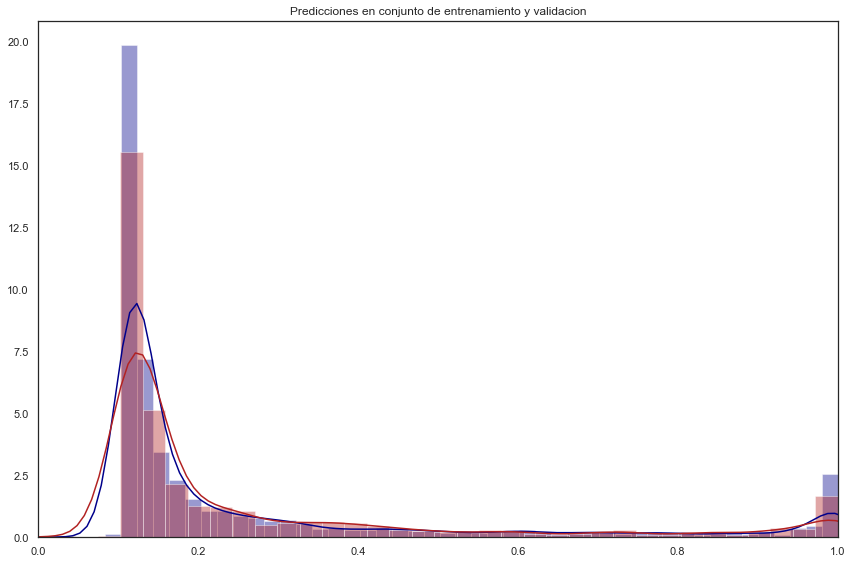

In [630]:


# Comparemos el rendimiento del modelo de prediccion en el conjunto de entrnamiento y validacion.

fig = plt.figure(figsize=(12,8))

sns.distplot(log.predict_proba(X_train)[:,1],color='darkblue')
sns.distplot(log.predict_proba(X_val)[:,1],color='firebrick')
plt.title('Predicciones en conjunto de entrenamiento y validacion')
plt.xlim([0, 1])

plt.tight_layout()

plt.show()

### Curva ROC - Regresion Logistica

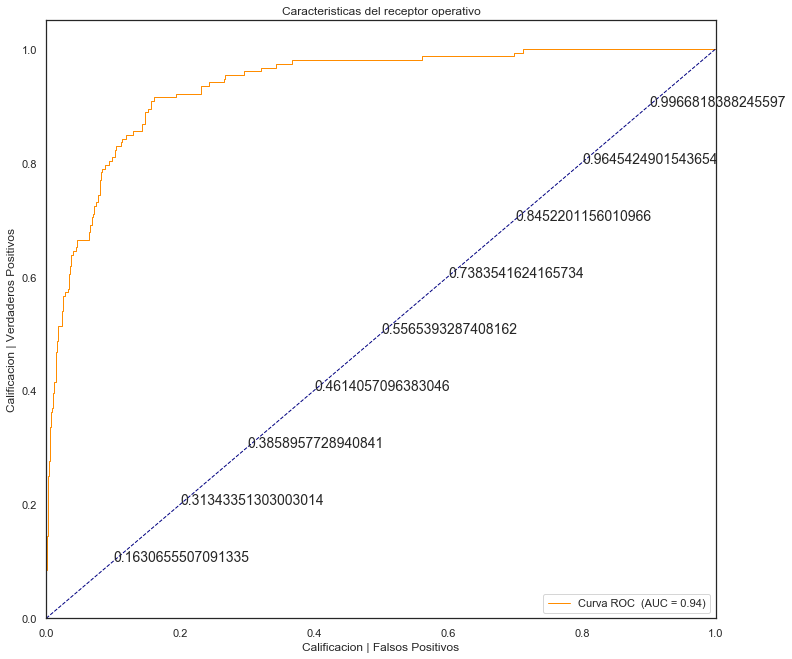

In [631]:
from sklearn.metrics import roc_curve, auc,precision_recall_curve
fpr, tpr, thresholds = roc_curve(y_val,log.predict_proba(X_val)[:,1])         
#log_val_pred_probability[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='Curva ROC  (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')

for label in range(1,10,1):
    plt.text((10-label)/10,(10-label)/10,thresholds[label*15],fontdict={'size': 14})

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Calificacion | Falsos Positivos')
plt.ylabel('Calificacion | Verdaderos Positivos')
plt.title('Caracteristicas del receptor operativo')
plt.legend(loc="lower right")
plt.show()

In [632]:
fpr, tpr, thresholds =roc_curve(y_val, log.predict_proba(X_val)[:,1],pos_label=1)     
#log_val_pred_probability[:,1])
roc_auc = auc(fpr, tpr)
print("Area bajo la curva ROC  : %f" % roc_auc)



Area bajo la curva ROC  : 0.935794


### Precision vs Curva de Recuperacion - Regresion Logistica

Text(0.5, 1.0, 'Precision Vs Recall')

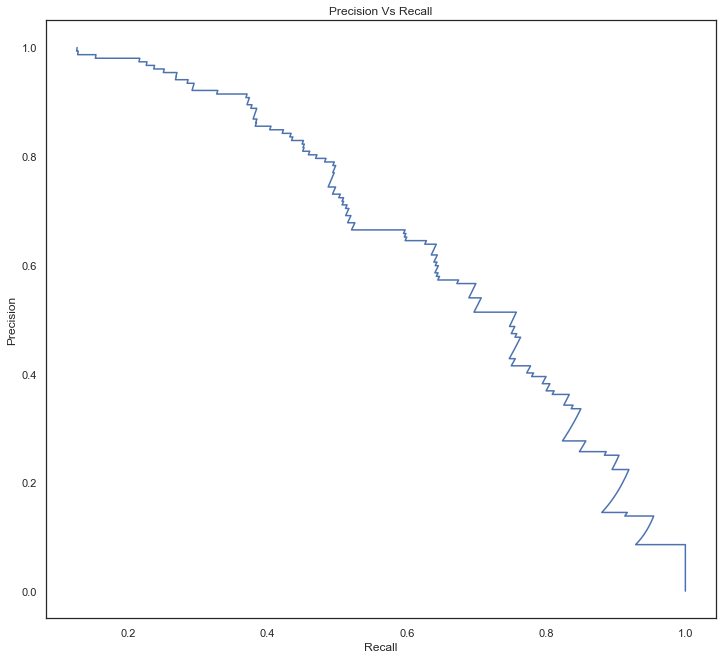

In [633]:
# Veamos la precision y su recall  
precision, recall, _ = precision_recall_curve(y_val, log.predict_proba(X_val)[:,1])

plt.plot(precision,recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Vs Recall')

### TPR vs FPR - Regresion Logistica

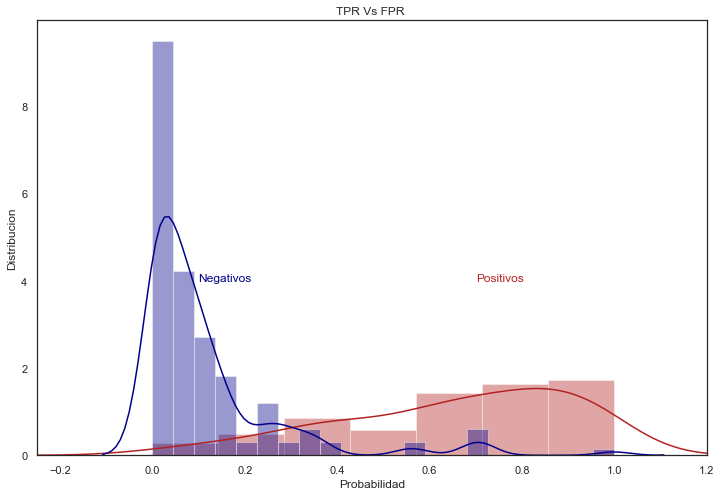

In [634]:
# Veamos la distribucion del TPR vs FPR

fig = plt.figure(figsize=(12,8))

sns.distplot(tpr,color='firebrick')

sns.distplot(fpr,color='darkblue')
plt.title('TPR Vs FPR ')
plt.xlim([-.25, 1.2])

plt.text(0.1,4,'Negativos',color='darkblue')
plt.text(0.7,4,'Positivos',color='firebrick')
plt.xlabel('Probabilidad')
plt.ylabel('Distribucion')
plt.show()

### Umbral de Clasificacion

---
Si el algoritmo devuelve probabilidades (o alguna otra puntuacion) se pueden aplicar umbrales despues de que se haya construido un modelo. Basicamente, cambiar el umbral de clasificacion de 50-50 a un nivel de compensacion apropiado. Normalmente se puede optimizar generando una curva de la metrica de evaluacion (por ejemplo, la medida F) La limitacion aca es que haciendo concesiones absolutas, cualquier modificacion en el limite, a su vez puede reducir la precision de la prediccion de la otra clase.


In [635]:
## Ajustemos la probabilidad del umbral a  0.60

log_train_pred_60=(log.predict_proba(X_train)[:,1]>0.60).astype(bool)
log_val_pred_60=(log.predict_proba(X_val)[:,1]>0.60).astype(bool)   

### Evaluacion - Regresion Logistica

In [636]:
# Matriz de Confusion, precision, sensibilidad y especifidad 

from sklearn.metrics import confusion_matrix,accuracy_score,cohen_kappa_score,roc_auc_score,f1_score,auc

cm0 = confusion_matrix(y_train, log_train_pred_60,labels=[1,0])
print('Matriz de confusion - Entrenamiento : \n', cm0)

cm1 = confusion_matrix(y_val, log_val_pred_60,labels=[1,0])
print('Matriz de Confusion Val: \n', cm1)

total0=sum(sum(cm0))
total1=sum(sum(cm1))
##### de la matriz de confusion calculamos la precision
accuracy0=(cm0[0,0]+cm0[1,1])/total0
print ('Precision Entrenamiento: ', accuracy0)

accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Precision  Val: ', accuracy1)

sensitivity0 = cm0[0,0]/(cm0[0,0]+cm0[0,1])
print('Sensibilidad Entrenamiento : ', sensitivity0 )

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensibilidad  Val: ', sensitivity1 )


specificity0 = cm0[1,1]/(cm0[1,0]+cm0[1,1])
print('Especifidad Entrenamiento: ', specificity0)

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Especifidad Val: ', specificity1)

KappaValue=cohen_kappa_score(y_val, log_val_pred_60)
print("Valor Kappa :",KappaValue)
AUC=roc_auc_score(y_val, log_val_pred_60)

print("AUC         :",AUC)

print("F1-Puntuacion Entrenamiento : ",f1_score(y_train, log_train_pred_60))

print("F1-Puntuacion  Val  : ",f1_score(y_val, log_val_pred_60))

Matriz de confusion - Entrenamiento : 
 [[ 270   84]
 [ 210 3223]]
Matriz de Confusion Val: 
 [[ 103   49]
 [  93 1378]]
Precision Entrenamiento:  0.922365988909427
Precision  Val:  0.9125077017868145
Sensibilidad Entrenamiento :  0.7627118644067796
Sensibilidad  Val:  0.6776315789473685
Especifidad Entrenamiento:  0.9388290125254879
Especifidad Val:  0.9367777022433719
Valor Kappa : 0.5438304105142315
AUC         : 0.8072046405953702
F1-Puntuacion Entrenamiento :  0.6474820143884892
F1-Puntuacion  Val  :  0.5919540229885056


Matriz de confusion - Entrenamiento : 
 [[ 270   84]
 [ 210 3223]]
Matriz de Confusion Val: 
 [[ 103   49]
 [  93 1378]]
Precision Entrenamiento:  0.922365988909427
Precision  Val:  0.9125077017868145
Sensibilidad Entrenamiento :  0.7627118644067796
Sensibilidad  Val:  0.6776315789473685
Especifidad Entrenamiento:  0.9388290125254879
Especifidad Val:  0.9367777022433719
Valor Kappa : 0.5438304105142315
AUC         : 0.8072046405953702
F1-Puntuacion Entrenamiento :  0.6474820143884892
F1-Puntuacion  Val  :  0.5919540229885056

### Prediccion - Conjunto de entrenamiento

In [637]:
log_test_pred_60 = (log.predict_proba(X_teststd)[:,1]>0.60).astype(bool)
log_test_pred=pd.DataFrame(log_test_pred_60)
log_test_pred.head(2)

,0
0,False
1,False


In [638]:
# Cambiemos 1 con Si y 0 con No
Replacement = {1:'Si',0:'No'}

Labels=log_test_pred[0].apply(lambda x : Replacement[x])
Labels.value_counts()    # Revisamos el contador de predicciones

No    1182
Si     171
Name: 0, dtype: int64

In [639]:
## Archivo Final

submission_log=pd.DataFrame({"Provider":Test_category_removed_groupedbyProv_PF.Provider})
submission_log['PotentialFraud']=Labels
submission_log.shape

(1353, 2)

In [640]:
print('Shape Final :',submission_log.shape)

Shape Final : (1353, 2)


In [641]:
# Escribimos el archivo final

submission_log.to_csv("Submission_Logistic_Regression_F1_60_Threshold_60Prcnt.csv",index=False)


In [642]:
submission_log.PotentialFraud.value_counts()

No    1182
Si     171
Name: PotentialFraud, dtype: int64

## Random Forest

In [643]:
# Usemos el modelo Random Forest de sklearn 
from sklearn.ensemble import RandomForestClassifier

In [644]:
rfc = RandomForestClassifier(n_estimators=500,class_weight='balanced',random_state=123,max_depth=4)   
# Vamos a dejar el maximo de profundidad en 4  max_depth =4


In [645]:
rfc.fit(X_train,y_train)  # Ajustamos el modelo

RandomForestClassifier(class_weight='balanced', max_depth=4, n_estimators=500,
                       random_state=123)

### Curva ROC - Random Forest

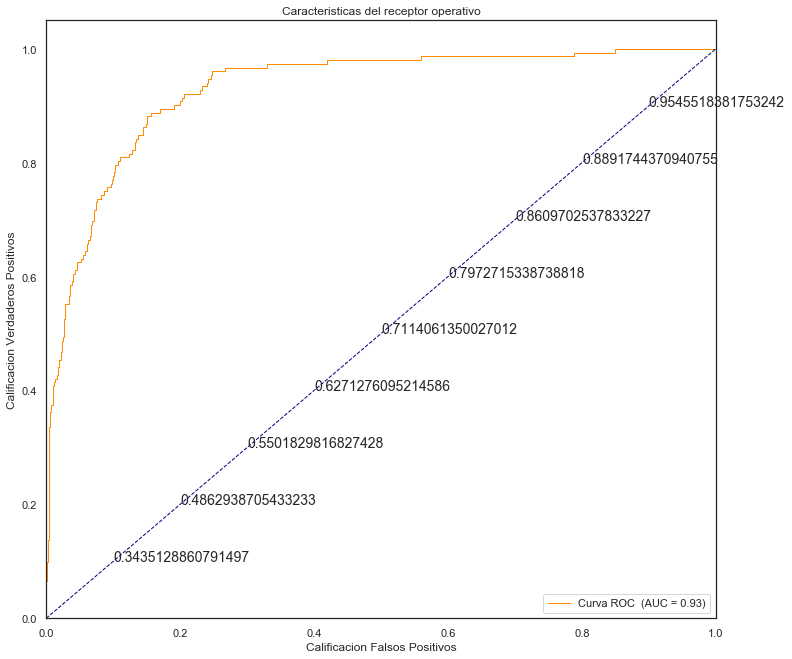

In [646]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_val, rfc.predict_proba(X_val)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='Curva ROC  (AUC = %0.2f)' % roc_auc)

for label in range(1,10,1):
    plt.text((10-label)/10,(10-label)/10,thresholds[label*15],fontdict={'size': 14})
    
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Calificacion Falsos Positivos')
plt.ylabel('Calificacion Verdaderos Positivos')
plt.title('Caracteristicas del receptor operativo')
plt.legend(loc="lower right")
plt.show()

### TPR vs FPR - Random Forest

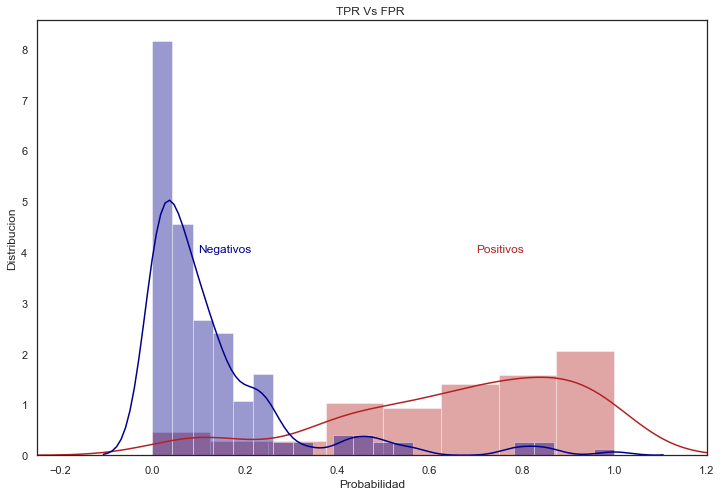

In [647]:
fig = plt.figure(figsize=(12,8))

sns.distplot(tpr,color='firebrick')

sns.distplot(fpr,color='darkblue')
plt.title('TPR Vs FPR ')
plt.xlim([-.25, 1.2])

plt.text(0.1,4,'Negativos',color='darkblue')
plt.text(0.7,4,'Positivos',color='firebrick')
plt.xlabel('Probabilidad')
plt.ylabel('Distribucion')
plt.show()

In [648]:
rfc_train_pred = (rfc.predict_proba(X_train)[:,1]>0.5).astype(bool)   # Ajustamos el umbral a 0.5
rfc_val_pred = (rfc.predict_proba(X_val)[:,1]>0.5).astype(bool)# Ajustamos el umbral a 0.5

### Evaluacion de Modelo - Random Forest


In [649]:
# Matriz de confusion, Precision, sensibilidad y especifidad
from sklearn.metrics import confusion_matrix,accuracy_score,cohen_kappa_score,roc_auc_score,f1_score,roc_curve

cm0 = confusion_matrix(y_train, rfc_train_pred,labels=[1,0])
print('Matriz de confusion Entrenamiento : \n', cm0)

cm1 = confusion_matrix(y_val, rfc_val_pred,labels=[1,0])
print('Matriz de confusion Prueba: \n', cm1)

total0=sum(sum(cm0))
total1=sum(sum(cm1))
##### de la matriz de confusion calculamos la precision
accuracy0=(cm0[0,0]+cm0[1,1])/total0
print ('Precision Entrenamiento : ', accuracy0)

accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Precision Prueba : ', accuracy1)

sensitivity0 = cm0[0,0]/(cm0[0,0]+cm0[0,1])
print('Sensitivity Train : ', sensitivity0 )

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity Val : ', sensitivity1 )

specificity0 = cm0[1,1]/(cm0[1,0]+cm0[1,1])
print('Specificity Train: ', specificity0)

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity Val : ', specificity1)

KappaValue=cohen_kappa_score(y_val, rfc_val_pred)
print("Valor Kappa :",KappaValue)
AUC=roc_auc_score(y_val, rfc_val_pred)
print("AUC         :",AUC)


print("F1-Puntuacion Entrenamiento",f1_score(y_train,rfc_train_pred))
print("F1-Puntuacion Validacion : ",f1_score(y_val, rfc_val_pred))

Matriz de confusion Entrenamiento : 
 [[ 319   35]
 [ 389 3044]]
Matriz de confusion Prueba: 
 [[ 124   28]
 [ 182 1289]]
Precision Entrenamiento :  0.8880380248217586
Precision Prueba :  0.8706099815157117
Sensitivity Train :  0.9011299435028248
Sensitivity Val :  0.8157894736842105
Specificity Train:  0.88668802796388
Specificity Val :  0.876274643099932
Valor Kappa : 0.47589611108548224
AUC         : 0.8460320583920713
F1-Puntuacion Entrenamiento 0.60075329566855
F1-Puntuacion Validacion :  0.5414847161572053


Matriz de confusion Entrenamiento : 
 [[ 320   34]
 [ 388 3045]]
Matriz de confusion Prueba: 
 [[ 124   28]
 [ 181 1290]]
Precision Entrenamiento :  0.8885661473461843
Precision Prueba :  0.8712261244608749
Sensibilidad :  0.8157894736842105
Especifidad :  0.8769544527532291
Valor Kappa : 0.47733173495472203
AUC         : 0.8463719632187199
F1-Puntuacion Entrenamiento 0.6026365348399246
F1-Puntuacion Validacion :  0.5426695842450766

### Caracteristicas Importantes - Random Forest

In [650]:
feature_list = list(Test_category_removed_groupedbyProv_PF.columns)
# Obtengamos caracteristicas numericas importantes
importances = list(rfc.feature_importances_)
# Lista de tuplas con variables e importancia
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list[1:], importances)]
# Ordenemos las caracteristicas importantes en orden descendente
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Mostramos las caracteristicas y su importancia 
print(' Las Principales 20 caracteristicas que afectan el modelo Random Forest y su puntuacion de importancia :- \n',)
[print('Variable: {:20} Importancia: {}'.format(*pair)) for pair in feature_importances[:15]];

 Las Principales 20 caracteristicas que afectan el modelo Random Forest y su puntuacion de importancia :- 

Variable: PerProviderAvg_InscClaimAmtReimbursed Importancia: 0.09
Variable: InscClaimAmtReimbursed Importancia: 0.07
Variable: PerAttendingPhysicianAvg_InscClaimAmtReimbursed Importancia: 0.07
Variable: PerOperatingPhysicianAvg_InscClaimAmtReimbursed Importancia: 0.06
Variable: PerClmAdmitDiagnosisCodeAvg_InscClaimAmtReimbursed Importancia: 0.04
Variable: PerClmAdmitDiagnosisCodeAvg_DeductibleAmtPaid Importancia: 0.04
Variable: PerClmDiagnosisCode_1Avg_DeductibleAmtPaid Importancia: 0.04
Variable: PerOperatingPhysicianAvg_IPAnnualReimbursementAmt Importancia: 0.03
Variable: ClmCount_Provider_ClmDiagnosisCode_7 Importancia: 0.03
Variable: ClmCount_Provider_ClmDiagnosisCode_8 Importancia: 0.03
Variable: ClmCount_Provider_ClmDiagnosisCode_9 Importancia: 0.03
Variable: DeductibleAmtPaid    Importancia: 0.02
Variable: AdmitForDays         Importancia: 0.02
Variable: PerProviderAvg_Ded

### Prediccion en Datos de Prueba - Random Forest

In [651]:
rfc_test_pred = rfc.predict(X_teststd)

In [652]:
rfc_test_pred=pd.DataFrame(rfc_test_pred)
rfc_test_pred.head(2)

,0
0,0
1,0


In [653]:
## Cambiamos el 1 con Si y 0 con No

Replacement = {1:'Si',0:'No'}

Labels=rfc_test_pred[0].apply(lambda x : Replacement[x])

In [654]:
Labels.value_counts()

No    1094
Si     259
Name: 0, dtype: int64

In [655]:
submission_rfc=pd.DataFrame({"Provider":Test_category_removed_groupedbyProv_PF.Provider})
submission_rfc['PotentialFraud']=Labels
submission_rfc.shape

(1353, 2)

In [656]:
print('Shape Final',submission_rfc.shape)

Shape Final (1353, 2)


In [657]:
# Escribimos el archivo final para el Random Forest

submission_rfc.to_csv("Submission_Random_Forest_Estimator_F1_60_estimators_3000.csv",index=False)

## Rendimiento en otros modelos
Veamos el rendimiento en otros modelos como:


*   Support Vector Classifier (SVC)
*   Ada Boost Classifier
*   Decision Tree Classifier
*   Random Forest Classifier
*   Gradient Boosting Classifier
*   Regresion Logistica
*   XGBOOST Classifier


---







In [658]:
from collections import Counter
from sklearn.naive_bayes import MultinomialNB

from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import pprint

In [659]:
clfs = {
    'svm1': SVC(C=0.01,kernel='linear',probability=1),
    'svm2': SVC(C=0.01,kernel='rbf',probability=1),
    'svm3': SVC(C=.01,kernel='poly',degree=2,probability=1),
    'ada': AdaBoostClassifier(),
    'dtc': DecisionTreeClassifier(class_weight='balanced'),
    'gbc': GradientBoostingClassifier(),
    'lr': LogisticRegression(class_weight='balanced'),
    'xgb': XGBClassifier(booster='gbtree')
}

In [660]:
## Ajustemos estos modelos y revisemos su rendimiento  

f1_scores = dict()
for clf_name in clfs:
    print(clf_name)
    clf = clfs[clf_name]
    clf.fit(X_train, y_train)
    y_pred =((clf.predict_proba(X_val)[:,1]>0.5).astype(bool))
    f1_scores[clf_name] = f1_score(y_pred, y_val)

svm1
svm2
svm3
ada
dtc
gbc
lr
xgb


In [661]:
pprint.pprint(f1_scores) # Mostramos la puntuaciones en F1

{'ada': 0.5309090909090909,
 'dtc': 0.4270462633451957,
 'gbc': 0.597609561752988,
 'lr': 0.6045340050377834,
 'svm1': 0.5,
 'svm2': 0.5551020408163265,
 'svm3': 0.41000000000000003,
 'xgb': 0.5477178423236515}


Segun las puntuaciones de arriba podemos ver que el modelo de regresion logistica tiene un mejor rendimiento comparado con otros modelos

### Analisis de Componente principales (PCA)

In [662]:
Train_category_removed_groupedbyProv_PF.head(2)
Test_category_removed_groupedbyProv_PF.head(2)

,Provider,InscClaimAmtReimbursed,DeductibleAmtPaid,AdmitForDays,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,...,ClmCount_Provider_BeneID_AttendingPhysician_ClmProcedureCode_1,ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_1,ClmCount_Provider_BeneID_OperatingPhysician,ClmCount_Provider_BeneID_ClmProcedureCode_1,ClmCount_Provider_BeneID_ClmDiagnosisCode_1,ClmCount_Provider_BeneID_ClmDiagnosisCode_1_ClmProcedureCode_1,Gender_2,Race_2,Race_3,Race_5
0,PRV51002,53790,380.0,0.0,2424,2460,79,108,72,25,...,0.0,202.0,30.0,0.0,204.0,0.0,134.0,30.0,2.0,4.0
1,PRV51006,30720,0.0,0.0,1224,1224,35,69,50,15,...,0.0,99.0,26.0,0.0,99.0,0.0,59.0,26.0,0.0,0.0


In [663]:
# Vamos a usar la funcion Standard Scaler para escalar la informacion
sc_pca=StandardScaler()
sc_pca=sc.fit(Train_category_removed_groupedbyProv_PF.iloc[:,2:])
Train_category_removed_groupedbyProv_PF_scaled=sc_pca.transform(Train_category_removed_groupedbyProv_PF.iloc[:,2:])
Train_category_removed_groupedbyProv_PF_scaled=pd.DataFrame(Train_category_removed_groupedbyProv_PF_scaled)

Test_category_removed_groupedbyProv_PF_scaled=sc_pca.transform(Test_category_removed_groupedbyProv_PF.iloc[:,1:])
Test_category_removed_groupedbyProv_PF_scaled=pd.DataFrame(Test_category_removed_groupedbyProv_PF_scaled)


In [664]:
Train_category_removed_groupedbyProv_PF_scaled.shape

(5410, 156)

In [665]:
Test_category_removed_groupedbyProv_PF_scaled.shape

(1353, 156)

### Varianza Maxima - PCA


In [666]:
from sklearn.decomposition import PCA  #import PCA

In [667]:
# Tomemos 29 componentes del PCA
pca = PCA(n_components=29)

In [668]:
pca.fit(Train_category_removed_groupedbyProv_PF_scaled.iloc[:,0:])

PCA(n_components=29)

In [669]:
print('Explicacion de la varianza del PCA  :\n',np.round(pca.explained_variance_ratio_,3))

Explicacion de la varianza del PCA  :
 [0.686 0.218 0.024 0.015 0.009 0.007 0.005 0.004 0.004 0.003 0.003 0.002
 0.002 0.002 0.002 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.    0.    0.    0.    0.   ]


In [670]:
# Transformamos los conjuntos de entrenamiento y prueba basandonos en los componentes del entrenamiento
train_pca=pca.transform(Train_category_removed_groupedbyProv_PF_scaled.iloc[:,0:])

test_pca=pca.transform(Test_category_removed_groupedbyProv_PF_scaled)

In [671]:
print('Shape Entrenamiento:',train_pca.shape)
print('Shape Prueba:',test_pca.shape)

Shape Entrenamiento: (5410, 29)
Shape Prueba: (1353, 29)


In [672]:
# Los convertimos a un dataframe con pandas

train_pca=pd.DataFrame((train_pca))
test_pca=pd.DataFrame(test_pca)

In [673]:
print('Shape Entrenamiento:',train_pca.shape)
print('Shape Prueba:',test_pca.shape)

Shape Entrenamiento: (5410, 29)
Shape Prueba: (1353, 29)


In [674]:
# Agregamos nuestro objetivo a los datos de entrenamiento 
train_pca['PotentialFraud']=Train_category_removed_groupedbyProv_PF.PotentialFraud

In [675]:
train_pca.isnull().sum().sum()
print('PCA - Entrenamiento',train_pca.shape)
#train_pca.head()
print('PCA- Prueba',test_pca.shape)

PCA - Entrenamiento (5410, 30)
PCA- Prueba (1353, 29)


In [676]:
train_pca.head(2)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,PotentialFraud
0,-2.392832,-0.339081,0.170838,0.578502,0.199659,0.097188,-0.292168,-0.068517,-0.030015,0.115047,...,-0.089662,-0.039332,-0.017732,-0.104980,-0.170528,0.027427,-0.177612,0.445410,-0.269249,0
1,9.054236,-9.842674,-0.519321,4.510588,-4.187689,-0.024749,0.288515,-0.383274,0.371051,0.307124,...,0.292384,-0.131860,-0.167554,-0.235616,0.131715,0.676481,0.151024,-0.499749,-0.216643,1


## Redes Neurales - Auto Encoder

El modelo AutoEncoder es un tipo de red neural que es utilizado para aprender patrones de datos eficientemente de manera no supervisada. El objetivo del autoencoder es aprender la representacion (encoding) para un conjunto de datos, normalmente para la reduccion de dimensionalidad. De lado de la reduccion, va aprendiendo en la reconstruccion, donde el autoencoder intenta regenerar a partir del encoding una representacion lo mas cercana posible a la entrada original, de ahi su nombre. Recientemente, el concepto del autoencoder ha sido utilizado en modelos generativos de datos.

Vamos a utilizar la misma tecnica para aprender patrones en datos no fraudulentos y con ellos entrenar el modelo. Utilizaremos el umbral de reconstruccion de error (reconstruction error threshold), para predecir la clase de datos de nuestro objetivo.

In [677]:
from sklearn.model_selection import train_test_split
# Vamos a convertir nuestros datos a arrays
train_pca = np.array(train_pca)
test_pca =np.array(test_pca)

In [678]:
# Dividimos los datos en train y test, y vamos a revisar sus dimensiones
X_train_pca, X_test_pca = train_test_split(train_pca, test_size=0.2, random_state=123)

print(X_train_pca.shape)
print(X_test_pca.shape)
print(test_pca.shape)

(4328, 30)
(1082, 30)
(1353, 29)


In [679]:
# Vamos a recaudar los registros fraudulentos y normales del train
print(np.unique(X_train_pca[:,29],return_counts=True))
print(np.unique(X_test_pca[:,29],return_counts=True))

(array([0., 1.]), array([3916,  412], dtype=int64))
(array([0., 1.]), array([988,  94], dtype=int64))


Vamos a utilizar los registros normales o no fraudulentos para entrenar el autoencoder y luego verificaremos el umbral de reconstruccion de error en los registros fraudulentos.

In [680]:
# Vamos a utilizar unicamente los registros normales o no fraudulentos para entrenar
X_train_NF = X_train_pca[X_train_pca[:,-1] == 0]
X_train_NF = X_train_NF[:,:-1]
print(X_train_NF.shape)

(3916, 29)


In [681]:
# Separamos los registros de fraude del conjunto de entrenamiento 
X_train_F = X_train_pca[X_train_pca[:,-1] == 1]
print(X_train_F.shape)

(412, 30)


In [682]:
# Agregamos o concatenamos los registros de fraude del train al test
X_test_pca=np.concatenate((X_test_pca,X_train_F),axis=0)
print(X_test_pca.shape)

(1494, 30)


In [683]:
# Separamos el 20% de los registros en prueba y evaluacion aleatoriamente
X_test,X_eval = train_test_split(X_test_pca, test_size=0.2, random_state=123)

In [684]:
print(X_test.shape)
print(X_eval.shape)

(1195, 30)
(299, 30)


In [685]:
# Separamos la variable independiente y nuestra variable clasificadora
y_test = X_test[:,-1]
X_test = X_test[:,:-1]

In [686]:
# Expandimos las dimensiones de y para concatenarla despues
y_test = np.expand_dims(y_test, axis=1)
y_test.shape

(1195, 1)

### Construccion de la red autoencoder

In [687]:
input_dim = X_train_NF.shape[1]   # Definimos la dimension de la entrada al numero de entradas
encoding_dim = 15               # Definimos la dimension del encoding de tamaño 15

In [688]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

autoencoder = Sequential()   # Agregamos nuestra red secuencial
# Agregamos el dropout para gregar ruido a los datos
autoencoder.add(Dropout(0.2, input_shape=(input_dim,)))   
# Agregamos una capa densa para codificar patrones utilizando RELU como funcion de activacion
autoencoder.add(Dense(encoding_dim, activation='relu'))   
# Agregamos otra capa densa del tamaño del shape de la entrada
autoencoder.add(Dense(input_dim, activation='linear'))    

In [689]:
nb_epoch = 100    # Numero de epocas o iteraciones
batch_size = 32   # Tamaño de los batch o muestras

## Como funcion de perdida utilizaremos la metrica mse ya que cada neurona puede ser un modelo de regresion lineal
autoencoder.compile(optimizer='adam', 
                    loss='mean_squared_error', 
                    metrics=['mse'])                      

In [690]:
## Ajustamos el modelo y guardamos su historial
hist = []
for _ in range(100):
    hist.append(autoencoder.fit(X_train_NF, X_train_NF,
                    epochs=1,
                    batch_size=batch_size,
                    shuffle=True,
                     validation_split=0.3,
                    verbose=0).history)

In [691]:
hist[0:5]   # Primeros 5 registros del historial

[{'val_loss': [0.9045782403743013],
  'val_mse': [0.9045782089233398],
  'loss': [1.3867310940110305],
  'mse': [1.3867311]},
 {'val_loss': [0.6466649806245844],
  'val_mse': [0.646665096282959],
  'loss': [0.9612056193713592],
  'mse': [0.9612054]},
 {'val_loss': [0.4311352413258654],
  'val_mse': [0.4311351776123047],
  'loss': [0.6752819001500687],
  'mse': [0.6752819]},
 {'val_loss': [0.2721615113603308],
  'val_mse': [0.2721615135669708],
  'loss': [0.43603028363008994],
  'mse': [0.43603027]},
 {'val_loss': [0.1976033395401975],
  'val_mse': [0.19760333001613617],
  'loss': [0.3257617859108002],
  'mse': [0.32576188]}]

In [692]:
## Hagamos predicciones en el conjunto de entrenamiento
predictions=autoencoder.predict(X_train_NF)

In [693]:
# Veamos las predicciones
predictions[0:2]   

array([[-3.92872858e+00,  5.05339205e-01,  4.61371958e-01,
         4.14755344e-02,  9.32967365e-02, -1.01828575e-03,
         2.24942833e-01,  1.29742175e-02,  2.09697485e-02,
        -2.60196924e-02, -6.41710758e-02, -1.08432770e-03,
        -1.31859183e-02,  6.89414144e-03,  3.56553495e-02,
         3.27761732e-02, -6.06704950e-02, -1.84410214e-02,
        -7.17061944e-03, -2.42340565e-03,  9.40261036e-03,
        -1.63688511e-02, -1.51855499e-02,  2.95669436e-02,
         7.64690340e-04,  1.12800859e-02,  1.49121583e-02,
        -5.16909733e-03, -1.48615018e-02],
       [-2.78166580e+00, -1.62294042e+00,  9.45493281e-01,
        -1.77552474e+00,  5.41075230e-01, -5.16759694e-01,
        -8.70277211e-02,  1.13295019e-03, -6.59662008e-01,
         9.17681754e-02,  1.39940232e-01, -2.00692967e-01,
        -1.03139281e-02, -2.09656119e-01,  4.61542159e-02,
         1.18846133e-01,  1.37296498e-01, -1.15260214e-01,
         1.02800131e-01, -1.02934808e-01,  1.11843273e-01,
         6.85

In [694]:
## Vamos a separar los registros fraudulentos y los no fraudulentos porque nos van a servir despues
f = np.hstack((X_test,y_test))
print(f.shape)

test_nf=f[f[:,29]==0]
print('Test_nf',test_nf.shape)

test_f=f[f[:,29]==1]
print('Test_f',test_f.shape)

(1195, 30)
Test_nf (788, 30)
Test_f (407, 30)


In [695]:
# Recuperemos los errores de los registros no fraudulentos por separado 
autoencoder.evaluate(test_nf[:,:29],test_nf[:,:29])

788/788 [==============================] - 0s 18us/step


[0.0876173646222365, 0.08761736750602722]

In [696]:
# Recuperemos los errores de los registros fraudulentos por separado
autoencoder.evaluate(test_f[:,:29],test_f[:,:29])

407/407 [==============================] - 0s 22us/step


[8.329905429109015, 8.329904556274414]

In [697]:
# Veamos las predicciones para los registros normales
predictions_nf=autoencoder.predict(test_nf[:,:29])

In [698]:
# Veamos las predicciones para los registros fraudulentos
predictions_f=autoencoder.predict(test_f[:,:29])

In [699]:
# Identifiquemos el metodo de calculo de errores por el autoencoder (MSE) 
np.mean(np.square(np.abs(test_nf[:,:29]-predictions_nf)))

0.08761735324396193

In [700]:
# Calculemos el error en lso datos no fraudulentos
errors_nf = np.mean(np.square(np.abs(test_nf[:,:29]-predictions_nf)), axis=1)

In [701]:
errors_nf[0:5]

array([0.00154889, 0.00034234, 0.025738  , 0.00096251, 0.00120109])

In [702]:
# Calculemos el error en los datos fraudulentos
errors_f = np.mean(np.square(np.abs(test_f[:,:29]-predictions_f)), axis=1)

In [703]:
errors_f[0:5]

array([ 0.06615107,  0.10073541,  0.29049325,  3.28271193, 13.40083282])

In [704]:
# Calculemos la distribucion de errores en los datos fraudulentos y no fraudulentos
print(np.min(errors_nf))
print(np.max(errors_nf))
print(np.median(errors_nf))

print(np.min(errors_f))
print(np.max(errors_f))
print(np.median(errors_f))

0.00019147375482142035
29.306351855186247
0.006930265680974405
0.000660710247953036
684.2210636990065
0.31378723301801215


Text(0.5, 0.98, 'Error boxplot for Fraud and nonfraud')

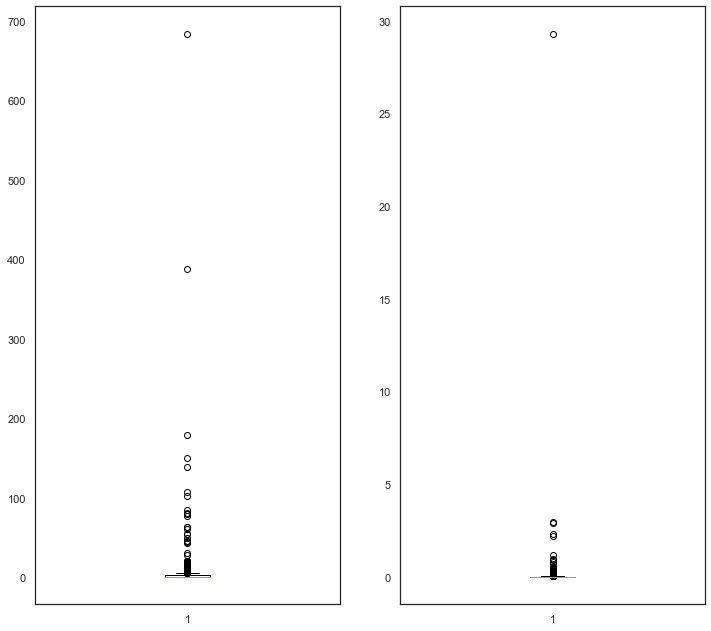

In [705]:
0.24613738200955018
# Grafiquemos el error en un diagrama de caja

plt.subplot(1, 2,1)
plt.boxplot(errors_f)

plt.subplot(1, 2, 2)
plt.boxplot(errors_nf)

fig.suptitle('Error boxplot for Fraud and nonfraud')

In [706]:
# Vammos a experimentar con el umbral para mejorar la clasificacion de una
# transaccion fraudulenta o no fraudulenta
print(sum(errors_nf>np.median(errors_f)))
print(sum(errors_f<np.median(errors_f)))
print(sum(errors_f<np.median(errors_nf)))
print(sum(errors_nf>np.median(errors_nf)))

26
203
5
394


In [707]:
print(errors_nf.shape)
print(errors_f.shape)

(788,)
(407,)


In [708]:
print(predictions_nf.shape)
print(predictions_f.shape)

(788, 29)
(407, 29)


In [709]:
test_pred = autoencoder.predict(X_test[:,:29])
test_recon  = (((test_pred-X_test)**2).mean(-1))

train_pred = autoencoder.predict(X_train_NF[:,:29])
mean_recon = (((train_pred - X_train_NF)**2).mean(-1).mean())

from sklearn.metrics import precision_score,recall_score,f1_score,confusion_matrix

scores_f1 = []
thres = []

th = 0
for i in range(100):
    th+=0.1
    fraud = (test_recon>mean_recon+th)
    scores_f1.append(f1_score(y_test,fraud))
    thres.append(th+mean_recon)
    

In [710]:
X_test.shape

(1195, 29)

0.17745387317631045


array([[740,  48],
       [153, 254]], dtype=int64)

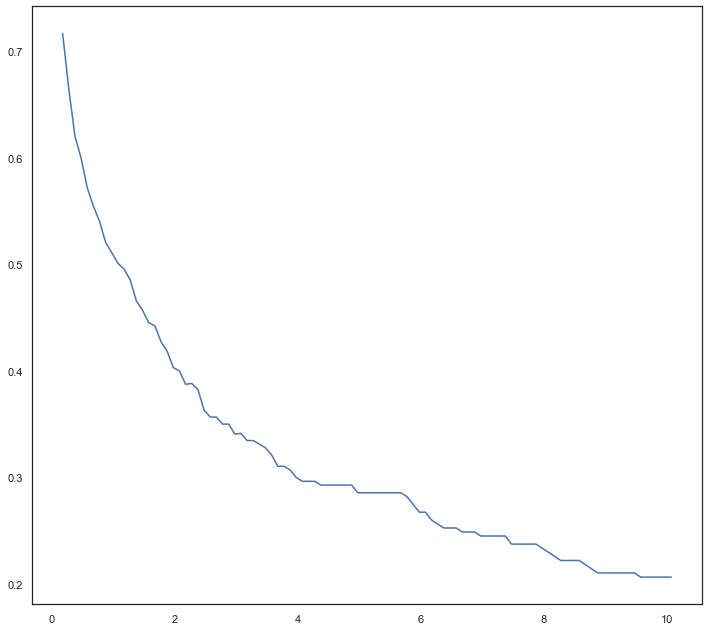

In [711]:
plt.plot(thres, scores_f1)

print(thres[np.array(scores_f1).argmax()])

fraud = (test_recon>thres[np.array(scores_f1).argmax()])

confusion_matrix(y_test, fraud)

In [712]:
# Vamos a predecir en el conjunto de validacion
predictions_eval=autoencoder.predict(X_eval[:,:29])

In [713]:
errors_eval=np.square(np.subtract(predictions_eval,X_eval[:,:29]))

In [714]:
threshold = 0.1718219230420997

fraud_eval = (((errors_eval-X_eval[:,:29])**2).mean(-1))>threshold

In [715]:
print(confusion_matrix(y_true=X_eval[:,29],y_pred=fraud_eval,labels=[1,0]))

[[ 99   0]
 [190  10]]


In [716]:
# Recuperamos el error en atributos individuales en datos no fraudulentos
ind_errors_nf=np.abs(np.subtract(predictions_nf,test_nf[:,:29]))
print(ind_errors_nf.shape)

(788, 29)


In [717]:
# Recuperamos el error en atributos individuales en datos fraudulentos
ind_errors_f=np.abs(np.subtract(predictions_f,test_f[:,:29]))
print(ind_errors_f.shape)

(407, 29)


In [718]:
# Combinamos el error detodos los registros fraudulentos y los normales 
X=np.concatenate((ind_errors_f,ind_errors_nf),axis=0)
print(X.shape)

(1195, 29)


In [719]:
# Creamos una columna objetivo 
x=np.array([1,0])
Y=np.repeat(x,[788,407])

In [720]:
# Expadimos el shape del objetivo para combinarlo con todos los demas atributos
print(Y.shape)
Y = np.expand_dims(Y, axis=1)
print(Y.shape)

(1195,)
(1195, 1)


In [721]:
# Concatenamos todos los errores de los atributos con nuestra clase objetivo
X=np.concatenate((X,Y),axis=1)
print(X.shape)

(1195, 30)


In [722]:
map(str,range(X.shape[1]))

In [723]:
# Creamos un data frame y nombramos sus columnas
X=pd.DataFrame(X)
X.columns = map(str, range(X.shape[1]))

In [724]:
# Fusionamos loa datos para la visualizacion del diagrama de caja
M = pd.melt(X, "29", var_name="var", value_name="value")
M['29'].astype('category')
M.tail()
#M.head()



,29,var,value
34650,0.0,28,0.006050
34651,0.0,28,0.303915
34652,0.0,28,0.022601
34653,0.0,28,0.031501
34654,0.0,28,0.080439


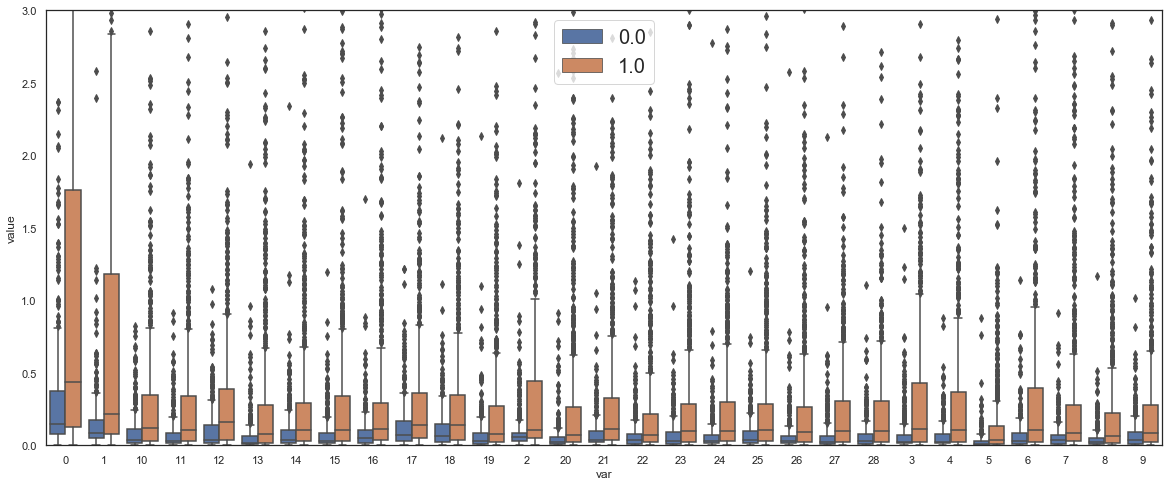

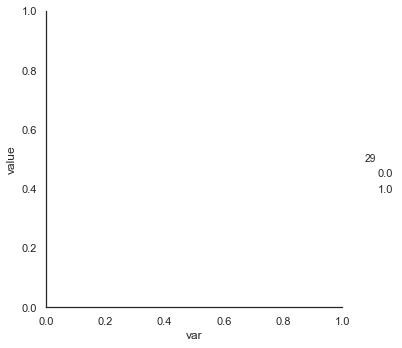

In [725]:
import seaborn as sns
size=(20,8)
fig,ax = plt.subplots(figsize=size)
# El tamaño de una hoja A4 o carta
g=sns.factorplot(x="var", y='value', hue="29", data=M, kind='box',ax=ax)
ax.set_yscale(value="linear")
ax.set_ybound(0,3)
ax.legend(fontsize=20)

In [726]:
pred_nf=ind_errors_nf[:,[0,1,11,17,18,4,8,14]]
np.mean(pred_nf,axis=0)

array([0.35193427, 0.18347292, 0.08535424, 0.13555292, 0.11744239,
       0.08650806, 0.07287291, 0.10388694])

In [727]:
pred_f=ind_errors_f[:,[0,1,11,17,18,4,8,14]]
np.mean(pred_f,axis=0)

array([4.14272929, 3.86275892, 0.60148711, 0.52528221, 0.47446113,
       0.72789787, 0.6738678 , 0.54330638])

In [728]:
# Distribucion percentil de error absoluto
percentile_nf = np.percentile(ind_errors_nf[:,[0,1,11,17,18,4,8,14]],[10,20,30,40,50,60,70,80,90,100],axis=0)

In [729]:
# Percentil de no fraudulento
percentile_nf

array([[3.96311611e-02, 2.13236425e-02, 7.34479541e-03, 1.13086940e-02,
        6.69311058e-03, 6.74983131e-03, 3.48441070e-03, 5.76365394e-03],
       [6.68330998e-02, 4.10427798e-02, 1.38700285e-02, 2.02573889e-02,
        1.57598205e-02, 1.24903817e-02, 7.74617331e-03, 9.74293383e-03],
       [9.42432518e-02, 5.67224482e-02, 2.06410763e-02, 3.46573477e-02,
        2.77964919e-02, 1.70849334e-02, 1.11478658e-02, 1.63924149e-02],
       [1.15113137e-01, 7.15012332e-02, 2.58328073e-02, 4.81994135e-02,
        4.09988106e-02, 2.13445996e-02, 1.56474554e-02, 2.44703648e-02],
       [1.47328106e-01, 8.52096126e-02, 3.11821937e-02, 6.61420740e-02,
        6.11697762e-02, 2.88225707e-02, 2.19797454e-02, 3.77526832e-02],
       [2.43240623e-01, 1.12553486e-01, 3.96176579e-02, 9.72566877e-02,
        9.10785876e-02, 4.34995637e-02, 2.96201817e-02, 5.66111986e-02],
       [3.23967575e-01, 1.49870340e-01, 6.01374953e-02, 1.36193637e-01,
        1.28460673e-01, 7.17314034e-02, 4.32129721e-02, 9.

In [730]:
percentile_nf[:,7]

array([0.00576365, 0.00974293, 0.01639241, 0.02447036, 0.03775268,
       0.0566112 , 0.0960179 , 0.14214745, 0.24131296, 3.02189019])

In [731]:
percentile_f=np.percentile(ind_errors_f[:,[0,1,11,17,18,4,8,14]],[10,20,30,],axis=0)
np.percentile(ind_errors_f[:,[0,1,11,17,18,4,8,14]],[10,20,30,40,50,60,70,80,90,100],axis=0)

array([[2.05088750e-01, 1.13602210e-01, 4.84511864e-02, 5.60699075e-02,
        3.95325319e-02, 3.74559687e-02, 2.16520382e-02, 2.66204960e-02],
       [3.75135109e-01, 2.18835012e-01, 1.03062398e-01, 1.00299036e-01,
        8.17889051e-02, 7.85342232e-02, 4.93352504e-02, 6.17389204e-02],
       [5.92071241e-01, 3.62437971e-01, 1.45209049e-01, 1.44201692e-01,
        1.40925914e-01, 1.28106983e-01, 7.40908173e-02, 9.81388774e-02],
       [8.83656455e-01, 5.37609491e-01, 2.04205994e-01, 1.97075585e-01,
        2.03712196e-01, 1.84423465e-01, 1.10263691e-01, 1.47025657e-01],
       [1.21313921e+00, 1.01229355e+00, 2.86689697e-01, 2.70039397e-01,
        2.84053629e-01, 2.72732599e-01, 1.73617594e-01, 2.04811538e-01],
       [2.04811574e+00, 1.56727222e+00, 3.98024284e-01, 3.67172360e-01,
        3.72313723e-01, 4.34212390e-01, 2.49676426e-01, 2.89011868e-01],
       [3.44797548e+00, 2.59713507e+00, 5.61139989e-01, 4.85819734e-01,
        4.97038602e-01, 6.52330979e-01, 3.61845967e-01, 3.

In [732]:
percentile_f[:,7]

array([0.0266205 , 0.06173892, 0.09813888])

### Definimos el umbral

In [733]:
thr= 0.10003411   #0.50795386       #0.32079228

test_pred = autoencoder.predict(X_test)
test_pred.shape

(1195, 29)

In [734]:
recon_error= np.abs(np.subtract(test_pred,X_test[:,:29]))

In [735]:
recon_error.shape

(1195, 29)

In [736]:
from sklearn.metrics import precision_score,recall_score,accuracy_score,confusion_matrix
fraud = (recon_error[:,1]>thr)
print("Recall=",recall_score(y_test,fraud))
print("Precision=",precision_score(y_test,fraud))
print("Accuracy=",accuracy_score(y_test,fraud))
print("F1-Score",f1_score(y_test,fraud))

Recall= 0.914004914004914
Precision= 0.5131034482758621
Accuracy= 0.6753138075313807
F1-Score 0.657243816254417


In [737]:
print(confusion_matrix(y_true=y_test,y_pred=fraud,labels=[1,0]))

[[372  35]
 [353 435]]


### Evaluacion

In [738]:
predictions_eval=autoencoder.predict(X_eval[:,:29])
predictions_eval.shape

(299, 29)

In [739]:
ind_errors_eval=np.abs(np.subtract(predictions_eval,X_eval[:,:29]))
ind_errors_eval.shape



(299, 29)

In [740]:
fraud_eval=ind_errors_eval[:,1]>thr
print("Recall",recall_score(X_eval[:,29],fraud_eval))
print("Precision",precision_score(X_eval[:,29],fraud_eval))
print("Accuracy",accuracy_score(X_eval[:,29],fraud_eval))
print("F1-Score",f1_score(X_eval[:,29],fraud_eval))

Recall 0.8787878787878788
Precision 0.5209580838323353
Accuracy 0.6923076923076923
F1-Score 0.6541353383458647


In [741]:
print(confusion_matrix(y_true=X_eval[:,29],y_pred=fraud_eval,labels=[1,0]))

[[ 87  12]
 [ 80 120]]


In [742]:
fraud_eval[:6]

array([ True, False, False, False, False, False])

### Prediccion en datos no vistos

In [743]:
predictions_unseen = autoencoder.predict(test_pca[:,:29])
predictions_unseen.shape

(1353, 29)

In [744]:
ind_errors_unseen=np.abs(np.subtract(predictions_unseen,test_pca[:,:29]))
ind_errors_unseen.shape

(1353, 29)

In [745]:
fraud_unseen=ind_errors_unseen[:,1]>thr

In [746]:
fraud_unseen.shape

(1353,)

In [747]:
fraud_unseen[:5]

array([ True,  True, False, False,  True])

### Evaluemos los resultados con el modelo de mejor rendimiento

In [748]:
print("Recall",recall_score((log.predict_proba(X_teststd)[:,1]>0.60).astype(bool),fraud_unseen))
print("Precision",precision_score((log.predict_proba(X_teststd)[:,1]>0.60).astype(bool),fraud_unseen))
print("Accuracy",accuracy_score((log.predict_proba(X_teststd)[:,1]>0.60).astype(bool),fraud_unseen))
print("F1-Score",f1_score((log.predict_proba(X_teststd)[:,1]>0.60).astype(bool),fraud_unseen))
print("Kappa",cohen_kappa_score((log.predict_proba(X_teststd)[:,1]>0.60).astype(bool),fraud_unseen))

Recall 0.9122807017543859
Precision 0.241112828438949
Accuracy 0.6260162601626016
F1-Score 0.38141809290953543
Kappa 0.22683968017346523


In [749]:
fraud_unseen=pd.DataFrame(fraud_unseen)

In [750]:
fraud_unseen.shape
fraud_unseen.head(2)



,0
0,True
1,True


In [751]:
Replacement = {1:'Yes',0:'No'}

AE_Labels=fraud_unseen[0].apply(lambda x : Replacement[x])


In [752]:
AE_Labels.value_counts()

No     706
Yes    647
Name: 0, dtype: int64

In [753]:
submission_AutoEncoder=pd.DataFrame({"Provider":Test_category_removed_groupedbyProv_PF.Provider})
submission_AutoEncoder['PotentialFraud']=AE_Labels
submission_AutoEncoder.head(16)

,Provider,PotentialFraud
0,PRV51002,Yes
1,PRV51006,Yes
2,PRV51009,No
3,PRV51010,No
4,PRV51018,Yes
5,PRV51019,No
6,PRV51020,No
7,PRV51022,Yes
8,PRV51028,No
9,PRV51033,Yes


In [754]:
submission_AutoEncoder.shape

(1353, 2)

### Autoencoder con 2 capas ocultas

In [755]:
df = pd.DataFrame(train_pca)  # Usamos de nuevo el train_pca 
df.shape

(5410, 30)

In [756]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-2.392832,-0.339081,0.170838,0.578502,0.199659,0.097188,-0.292168,-0.068517,-0.030015,0.115047,...,-0.089662,-0.039332,-0.017732,-0.104980,-0.170528,0.027427,-0.177612,0.445410,-0.269249,0.0
1,9.054236,-9.842674,-0.519321,4.510588,-4.187689,-0.024749,0.288515,-0.383274,0.371051,0.307124,...,0.292384,-0.131860,-0.167554,-0.235616,0.131715,0.676481,0.151024,-0.499749,-0.216643,1.0
2,-0.011515,2.046151,-0.716978,-0.146993,0.017184,-0.050673,0.091485,0.276244,0.061555,0.071442,...,-0.014076,-0.195528,0.098438,-0.182748,0.009168,-0.088430,0.046533,0.041699,-0.037284,0.0
3,27.556811,15.327474,-6.246961,-1.948628,-1.010868,-0.633404,-0.175226,2.861287,0.735608,2.526892,...,-1.060102,0.654349,0.776490,-0.584956,0.531496,0.025008,-0.304724,0.346994,0.300012,1.0
4,-2.129760,0.780021,-0.077544,0.084201,-0.095472,-0.049679,0.434814,0.030702,-0.006299,0.114903,...,0.039094,-0.131035,-0.033790,-0.046169,-0.024517,-0.159670,0.037718,-0.041277,0.013187,0.0


In [757]:
df.isnull().values.any()   # revisamos los valores null

False

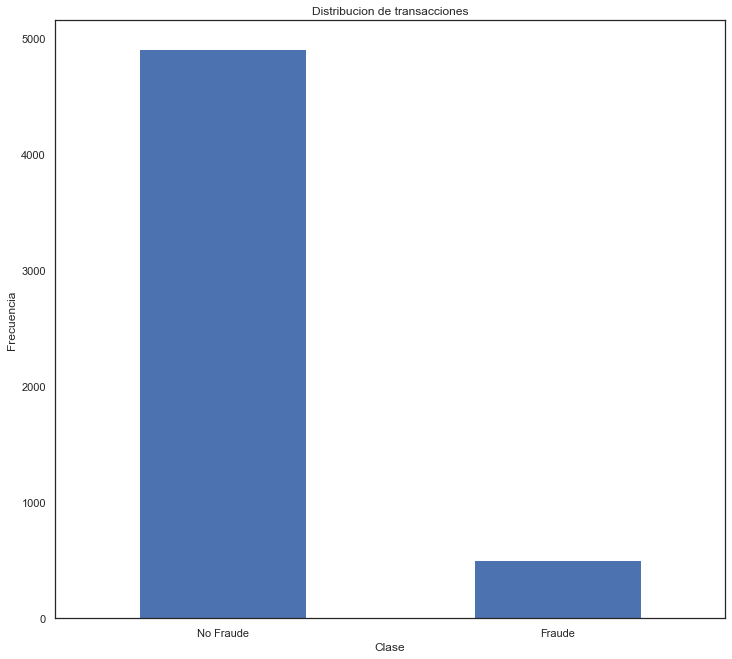

In [758]:
# Revisemos la distribucion de las transacciones
count_classes = pd.value_counts(df.iloc[:,29], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Distribucion de transacciones")
plt.xticks(range(2), LABELS)
plt.xlabel("Clase")
plt.ylabel("Frecuencia");


In [759]:
frauds = df[df.iloc[:,29] == 1]
normal = df[df.iloc[:,29] == 0]
print('Shape de registros fraudulentos :',frauds.shape)

Shape de registros fraudulentos : (506, 30)


In [760]:
print('Shape de registros normales:',normal.shape)

Shape de registros normales: (4904, 30)


In [761]:
X_train_AE, X_test_AE = train_test_split(df, test_size=0.2, random_state=RANDOM_SEED)
X_train_AE = X_train_AE[X_train_AE.iloc[:,29] == 0]
X_train_AE = X_train_AE.drop([29], axis=1)
y_test_AE = X_test_AE[29]
X_test_AE = X_test_AE.drop([29], axis=1)
X_train_AE = X_train_AE.values
X_test_AE = X_test_AE.values
X_train_AE.shape

###df[ df.columns[[1,3]] ]

(3927, 29)

### Agregamos 2 capas ocultas al autoencoder

In [762]:
from tensorflow.keras.models import Model, load_model,Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
from tensorflow.keras import regularizers
## AutoEncoder con dos capas ocultas 

input_dim = X_train_AE.shape[1]
encoding_dim = 14

input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="tanh", 
                activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)
decoder = Dense(int(encoding_dim / 2), activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)

In [763]:
nb_epoch = 100
batch_size = 32
autoencoder.compile(optimizer='adam', 
                    loss='mean_squared_error', 
                    metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath="model.h5",
                               verbose=0,
                               save_best_only=True)
tensorboard = TensorBoard(log_dir='logs',     #Tensorboard 
                          histogram_freq=0,
                          write_graph=True,
                          write_images=True)
history = autoencoder.fit(X_train_AE, X_train_AE,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_test_AE, X_test_AE),
                    verbose=1,
                    callbacks=[checkpointer, tensorboard]).history

Train on 3927 samples, validate on 1082 samples
Epoch 1/100
3927/3927 [==============================] - 1s 195us/sample - loss: 1.0343 - accuracy: 0.2791 - val_loss: 3.4915 - val_accuracy: 0.4972
Epoch 2/100
3927/3927 [==============================] - 0s 58us/sample - loss: 0.9725 - accuracy: 0.4915 - val_loss: 3.3760 - val_accuracy: 0.5462
Epoch 3/100
3927/3927 [==============================] - 0s 60us/sample - loss: 0.9123 - accuracy: 0.5297 - val_loss: 3.2489 - val_accuracy: 0.5813
Epoch 4/100
3927/3927 [==============================] - 0s 58us/sample - loss: 0.8643 - accuracy: 0.5870 - val_loss: 3.1683 - val_accuracy: 0.6470
Epoch 5/100
3927/3927 [==============================] - 0s 58us/sample - loss: 0.8343 - accuracy: 0.6855 - val_loss: 3.1013 - val_accuracy: 0.7163
Epoch 6/100
3927/3927 [==============================] - 0s 61us/sample - loss: 0.8109 - accuracy: 0.7331 - val_loss: 3.0439 - val_accuracy: 0.7403
Epoch 7/100
3927/3927 [==============================] - 0s 63u

Epoch 56/100
3927/3927 [==============================] - 0s 60us/sample - loss: 0.5568 - accuracy: 0.8729 - val_loss: 2.0247 - val_accuracy: 0.9011
Epoch 57/100
3927/3927 [==============================] - 0s 63us/sample - loss: 0.5558 - accuracy: 0.8768 - val_loss: 2.0174 - val_accuracy: 0.8993
Epoch 58/100
3927/3927 [==============================] - 0s 59us/sample - loss: 0.5552 - accuracy: 0.8689 - val_loss: 2.0114 - val_accuracy: 0.8863
Epoch 59/100
3927/3927 [==============================] - 0s 60us/sample - loss: 0.5541 - accuracy: 0.8801 - val_loss: 2.0042 - val_accuracy: 0.8706
Epoch 60/100
3927/3927 [==============================] - 0s 61us/sample - loss: 0.5533 - accuracy: 0.8808 - val_loss: 1.9979 - val_accuracy: 0.8725
Epoch 61/100
3927/3927 [==============================] - 0s 61us/sample - loss: 0.5527 - accuracy: 0.8872 - val_loss: 1.9879 - val_accuracy: 0.8919
Epoch 62/100
3927/3927 [==============================] - 0s 63us/sample - loss: 0.5518 - accuracy: 0.8864

In [764]:
# Carguemos el modelo 
autoencoder = load_model('model.h5')

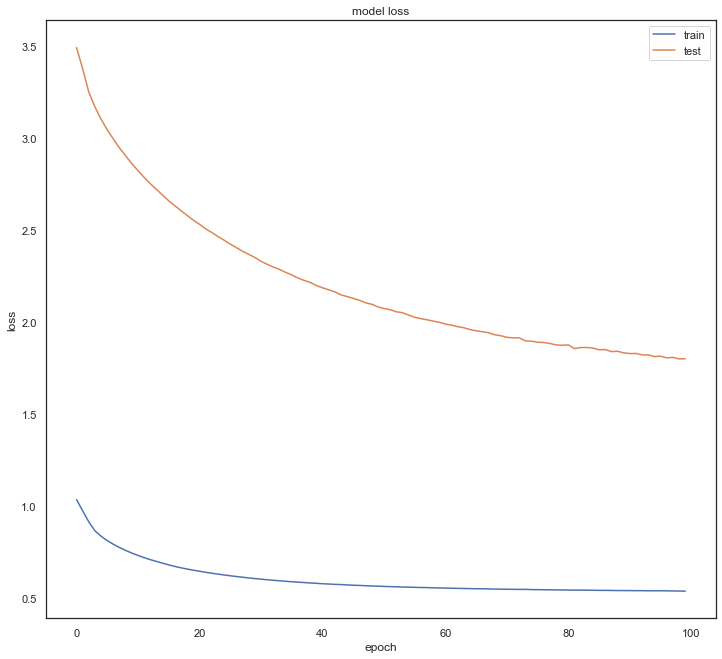

In [765]:
#plot the loss and Val loss
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [766]:
# Realicemos predicciones en el conjunto test y evaluemos

predictions = autoencoder.predict(X_test_AE)
mse = np.mean(np.power(X_test_AE - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test_AE})
error_df.describe()

,reconstruction_error,true_class
count,1082.000000,1082.000000
mean,1.798059,0.097043
std,12.607109,0.296153
min,0.025980,0.000000
25%,0.259272,0.000000
50%,0.453515,0.000000
75%,0.588359,0.000000
max,280.339739,1.000000


(0, 30)

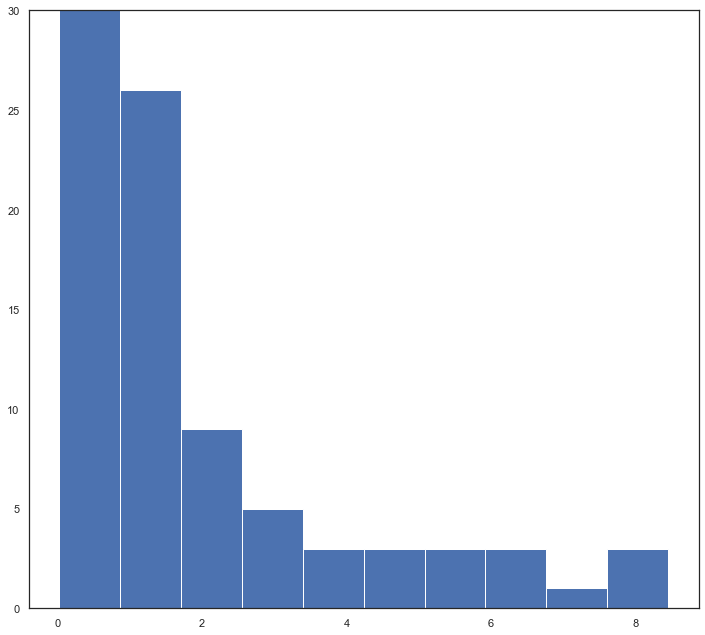

In [767]:
# Reconstruction error para los registros normales 
fig = plt.figure()
ax = fig.add_subplot(111)
normal_error_df = error_df[(error_df['true_class']== 0) & (error_df['reconstruction_error'] < 10)]
_ = ax.hist(normal_error_df.reconstruction_error.values, bins=10)

ax.set_ylim(0,30)

(0, 30)

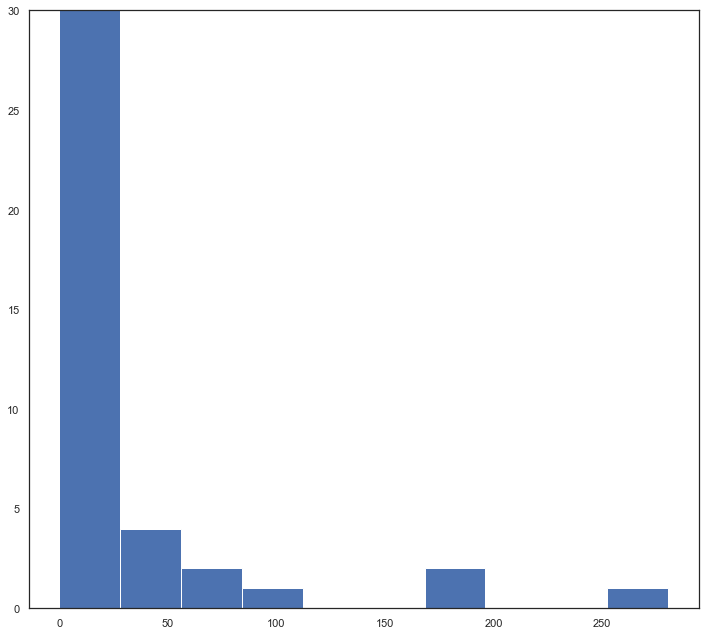

In [768]:
# Reconstruction Error con los registros fraudulentos

fig = plt.figure()
ax = fig.add_subplot(111)
fraud_error_df = error_df[error_df['true_class'] == 1]
_ = ax.hist(fraud_error_df.reconstruction_error.values, bins=10)
ax.set_ylim(0,30)

In [769]:
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

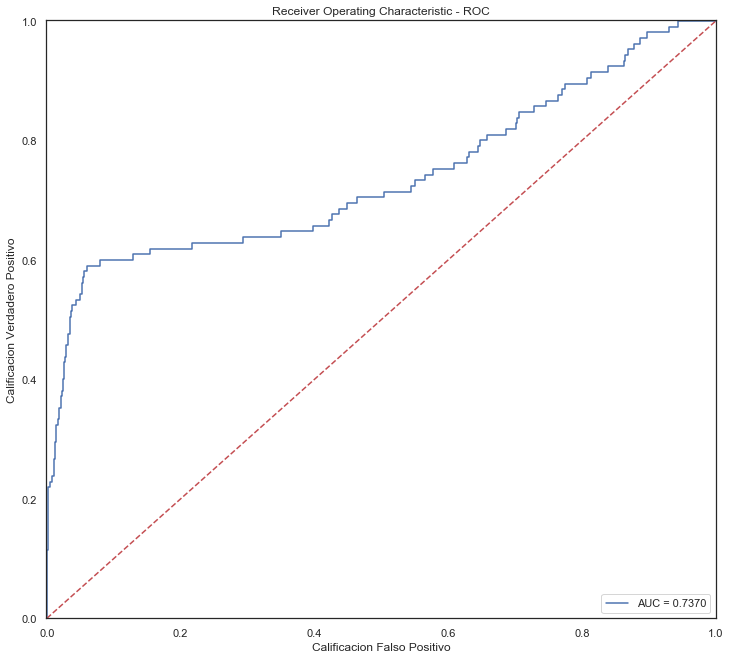

In [770]:
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)
### ROC para los errores y la clase verdadera

fpr, tpr, thresholds = roc_curve(error_df.true_class, error_df.reconstruction_error)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic - ROC')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('Calificacion Verdadero Positivo')
plt.xlabel('Calificacion Falso Positivo')
plt.show();

### Recall VS Precision

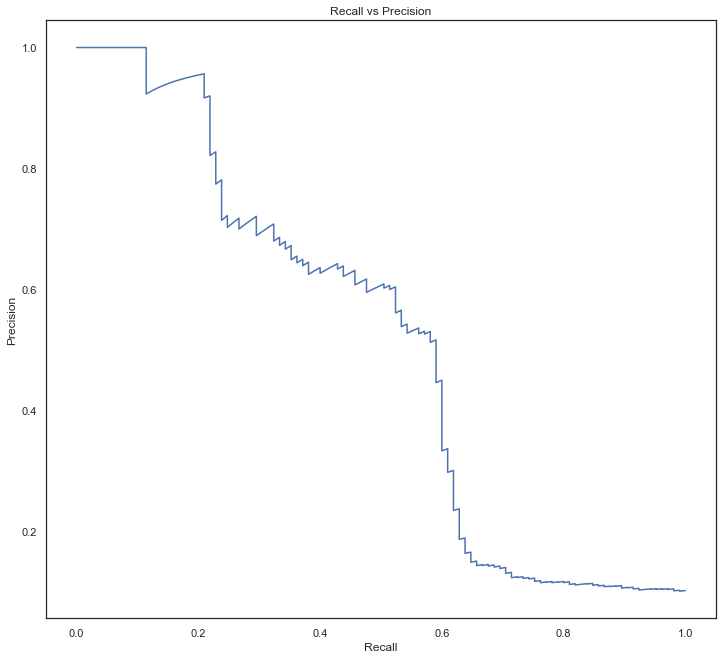

In [771]:
# Recall Vs Precision

precision, recall, th = precision_recall_curve(error_df.true_class, error_df.reconstruction_error)
plt.plot(recall, precision, 'b', label='Precision-Recall curve')
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

### Umbral VS Precision

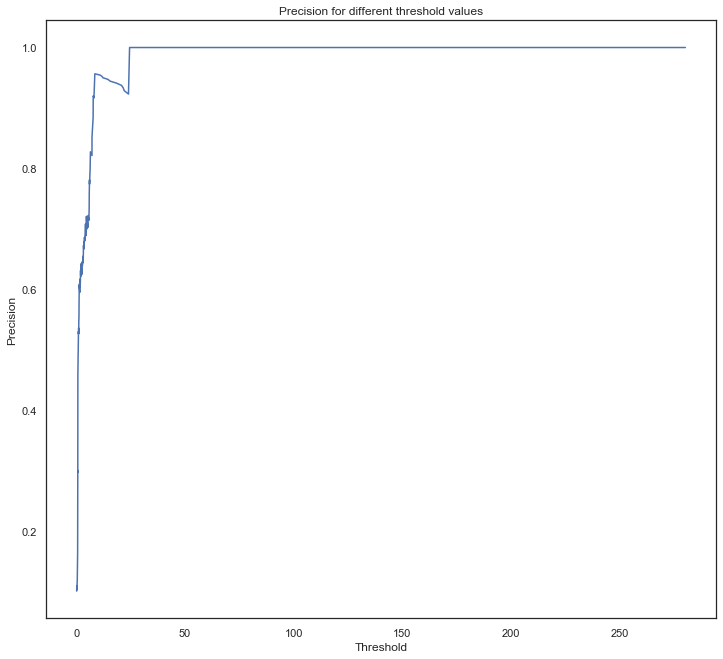

In [772]:
#Threshold Vs Precision 
plt.plot(th, precision[1:], 'b', label='Threshold-Precision curve')
plt.title('Precision for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.show()

### Recall VS Umbral

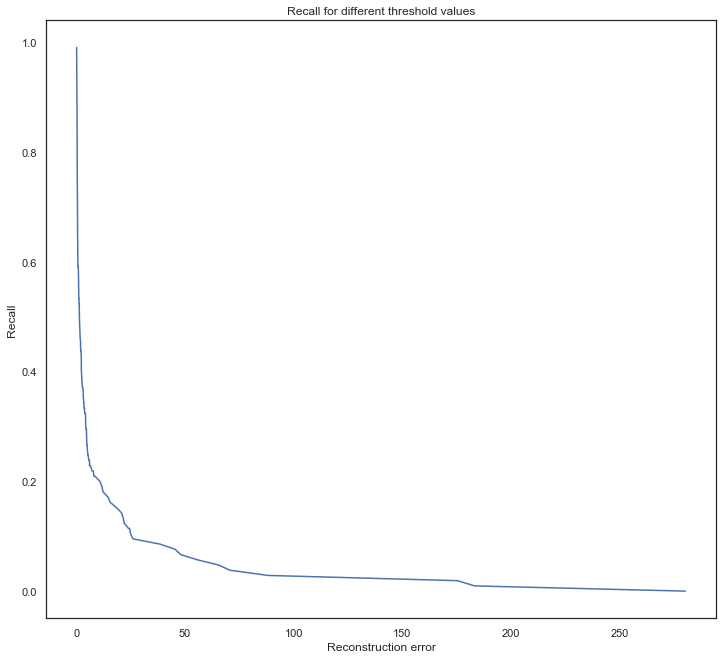

In [773]:
#Recall vs Thresold
plt.plot(th, recall[1:], 'b', label='Threshold-Recall curve')
plt.title('Recall for different threshold values')
plt.xlabel('Reconstruction error')
plt.ylabel('Recall')
plt.show()

In [774]:
threshold =0.95

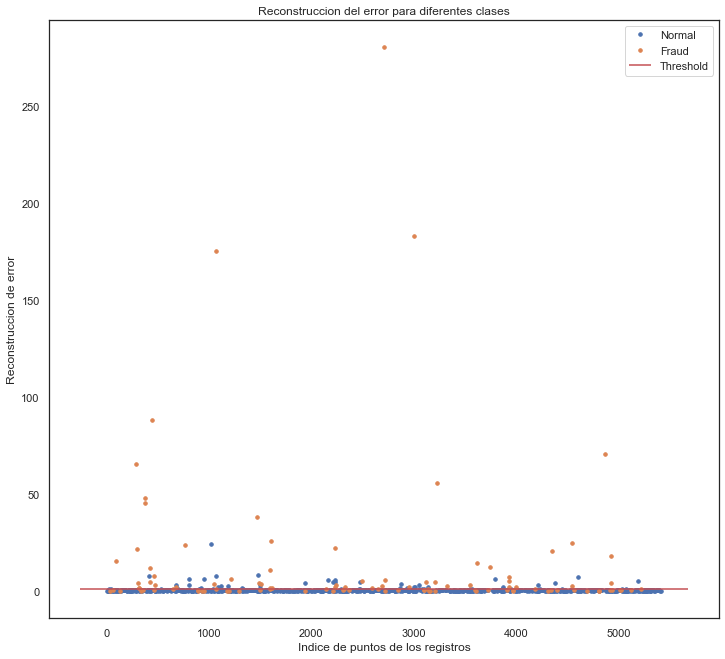

In [775]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruccion del error para diferentes clases")
plt.ylabel("Reconstruccion de error")
plt.xlabel("Indice de puntos de los registros")
plt.show();

### Prediccion de clase de transaccion basada en el error del umbral

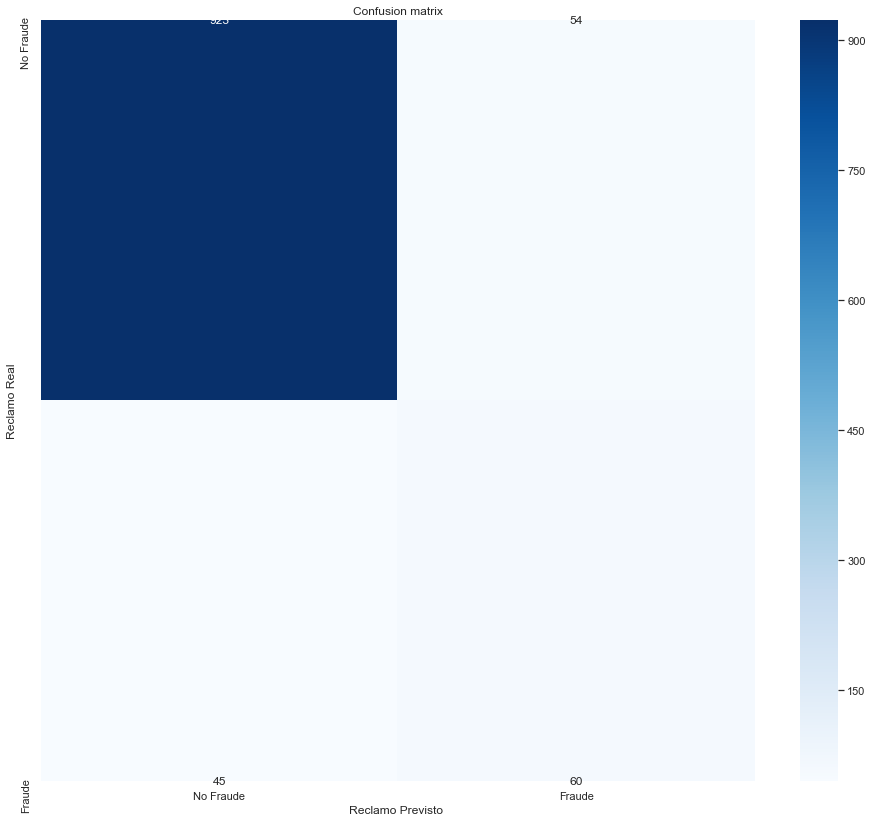

In [781]:
# Prediccion de clase de transaccion basada en el error del umbral

y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred,labels=[0,1])
plt.figure(figsize=(16, 14))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d",cmap='Blues');
plt.title("Confusion matrix")
plt.ylabel('Reclamo Real')
plt.xlabel('Reclamo Previsto ')
plt.show()

In [777]:
print('F1_Score:',f1_score(error_df.true_class, y_pred))

F1_Score: 0.547945205479452


In [778]:
cm1 = confusion_matrix(error_df.true_class, y_pred,labels=[1,0])
print('Confusion Matrix Val: \n', cm1)

total1=sum(sum(cm1))
##### Calculamos el accuracy con la matriz de confusion
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy Val: ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity Val: ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity Val: ', specificity1)

KappaValue=cohen_kappa_score(error_df.true_class, y_pred)
print("Kappa Value :",KappaValue)
AUC=roc_auc_score(error_df.true_class, y_pred)

print("AUC         :",AUC)

print("F1-Score Val  : ",f1_score(error_df.true_class, y_pred))

Confusion Matrix Val: 
 [[ 60  45]
 [ 54 923]]
Accuracy Val:  0.9085027726432532
Sensitivity Val:  0.5714285714285714
Specificity Val:  0.9447287615148413
Kappa Value : 0.49714108666873225
AUC         : 0.7580786664717063
F1-Score Val  :  0.547945205479452


Con solo 2 capas ocultas y 100 epocas se logro un F1-Score de ~0.59.

El modelo parece detectar varias transacciones fraudulentas. La cantidad de transacciones normales clasificadas como fraude es bastante alta. Como recomendacion, se podria establecer un umbral para crear un equilibrio entre las predicciones de transacciones fraudulentas y no fraudulentas. Tambien agregar mas datos al modelo y entrenarlo mejorara el rendimiento de la deteccion de nuevos patrones de fraude y nos ayudara a comprender mejor el comportamiento de los proveedores fraudulentos.

# Resumen de la Investigacion

---



En este trabajo de investigacion fueron utilizados algoritmos de aprendizaje de maquina supervisados y no supervisados. Los siguientes metodos fueron utilizados con el proposito de clasificar proveedores fraudulentos y no fraudulentos:




1.   **Ingenieria de Caracteristicas**

El fraude de medicare es categorizado como crimen organizado que involucra a pares que trabajan juntos para crear transacciones fraudulentas de reclamos. El agregar caracteristicas y agruparlas ayudo a mejorar la precision de la prediccion y el reconocimiento de patrones de fraude. Agrupar y agregar caracteristicas numericas a nivel de proveedor ayudo a detectar el comportamiento de sus transacciones en general.

2.   **Clasificador de Regresion Logistica**

Las caracteristicas derivadas del paso anterior se entrenan mediante el modelo de regresion logistica y se evalua. Mi decision de elegir el algoritmo de regresion logistica fue para verificar el comportamiento lineal entre las variables dependientes e independientes. El modelo logistico tambien agrega explicabilidad a las predicciones. El rendimiento del modelo de regresion logistica muestra la linealidad entre las variables.

3.   **Clasificador Random Forest (Bosque Aleatorio)**

Uno de los beneficios del random forest es el poder de manejar grandes conjuntos de datos con una mayor dimensionalidad. Puede manejar miles de variables de entrada e identificar las variables mas significativas. Ademas, el modelo da como resultado la importancia de la variable, que puede ser una caracteristica muy util. Otro beneficio es que verifica la no linealidad entre las variables.

4.   **Modelo de Red Neural AutoEncoder**

Los autoencoders (autocodificadores) son redes neuronales que tienen como objetivo copiar sus entradas a sus salidas. Trabajan comprimiendo la entrada en una representacion de espacio latente y luego reconstruyendo la salida a partir de una representacion. Para cumplir el objetivo de la investigacion se opto por entrenar datos no fraudulentos usando autoencoders y reconstruirlos de nuevo. Mientras se reconstruyen los datos fraudulentos, se creara un error, llamado error de reconstruccion. Basandonos en la configuracion del umbral de errores de reconstruccion, podemos predecir facilmente el comportamiento fraudulento de los proveedores de atencion medica.



# Conclusiones y Caracteristicas Importantes:



En este trabajo de investigacion estudie el comportamiento de los proveedores y descrubri que las siguientes caracteristicas importantes tienen un impacto en la prediccion de fraude o no fraude:


1.  PerProviderAvg_InscClaimAmtReimbursed  (Importancia: 8%)

2.   InscClaimAmtReimbursed (Importancia: 7%)
3.   PerAttendingPhysicianAvg_InscClaimAmtReimbursed (Importancia: 7%)
4.   PerOperatingPhysicianAvg_InscClaimAmtReimbursed (Importancia: 6%)
5.   PerClmAdmitDiagnosisCodeAvg_InscClaimAmtReimbursed (Importancia: 4%)



# Rendimiento de modelos basado en los objetivos de la investigacion

El umbral se puede establecer en las probabilidades de prediccion. Este umbral puede variar para el rendimiento de diferentes modelos.

Los modelos implementados se desempeñaron de manera consistente con una precision de ~0.91, una puntuacion AUROC de ~0.80 y una puntuacion Kappa de ~0.59

## Mejora del modelo

Segun el rendimiento del modelo anterior, existe un margen para mejorar el rendimiento del modello mediante las siguientes recomendaciones:



1.   Agregar mas datos de fraude al conjunto de datos de entrenamiento ya que ayudaria a predecir el comportamiento fradulento invisible de vez en cuando.

2.   Los metodos de ensembling con ajuste de parametros pueden mejorar el rendimiento de los modelos.

2.   La vectorizacion de los codigos medicos (codigos ICD 9) con un CountVectoriser puede mejorar el rendimiento.



## Recomendaciones y mejoras para el sector asegurador



1.   El modelo anterior ayudara a predecir el fraude de proveedores, lo que sera util para que las compañias de seguros examinen minuciosamente los reclamos hechos por los proveedores.

2.   Una mejora adicional en la investigacion ayudará al gobierno a tomar decisiones contra los proveedores de salud fraudulentos y ayudara a enmendar las reglas y regulaciones en este campo.

3.   La mejora del modelo ayudara a detectar redes de medicos, proveedores y beneficiarios fraudulentos.

4.   Este tipo de investigacion ayudará a mejorar la salud de la economia al reducir la inflacion causada por los fraudes y reducir las primas de seguros, lo que ciertamente no hara que la salud se convierta en un asunto costoso.

